### Instalaciones

In [4]:
# %pip install kmodes
# %pip install yellowbrick
# %pip install kneed
# %pip install fuzzy-c-means
# %pip install scikit-fuzzy
# %pip install seaborn
# %pip install pyclustertend

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: kmodes in c:\python311\lib\site-packages (0.12.2)




[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pyclustertend-1.6.2-py3-none-any.whl (7.1 kB)
  Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl (10.3 MB)
  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): still running...
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1629 lines of output]
      <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      Partial import of sklearn during the build process.
      <string>:116: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Python versions.
        For more details, see:
          https://numpy.org/devdocs/reference/distutils_status_migration.html
      
      
      INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      INFO: C:\Program Files\Microsoft Visual Studio\2022\Community\VC\Tools\MSV

### Importaciones

In [3]:
# Make imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import datasets
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import seaborn as sns
import random
import pyclustertend
from scipy import stats

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from kmodes.kprototypes import KPrototypes
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from kneed import KneeLocator

import sys
import warnings
warnings.filterwarnings("ignore")

Lectura de archivo csv

In [4]:
datos = pd.read_csv('Fuel_Consumption_2000-2022.csv')

Preprocesamiento y valores faltantes

In [ ]:
#Revision de valores nulos
# Chequear si hay valores nulos
nan_columns = datos.columns[datos.isna().any()].tolist()
print(nan_columns)
print(datos[datos.isna().any(axis=1)])
print(len(datos[datos.isna().any(axis=1)]))
print(len(datos))

[]
Empty DataFrame
Columns: [YEAR, MAKE, MODEL, VEHICLE CLASS, ENGINE SIZE, CYLINDERS, TRANSMISSION, FUEL, FUEL CONSUMPTION, HWY (L/100 km), COMB (L/100 km), COMB (mpg), EMISSIONS]
Index: []
0
22556


### Variables cuantitativas

#### Estadística descriptiva

In [ ]:
temp_descriptiva = datos.drop(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL'], axis=1)
descriptiva = temp_descriptiva.describe()
descriptiva

ENGINE SIZE     CYLINDERS  FUEL CONSUMPTION  HWY (L/100 km)  \
count  22556.000000  22556.000000      22556.000000    22556.000000   
mean       3.356646      5.854141         12.763513        8.919126   
std        1.335425      1.819597          3.500999        2.274764   
min        0.800000      2.000000          3.500000        3.200000   
25%        2.300000      4.000000         10.400000        7.300000   
50%        3.000000      6.000000         12.300000        8.400000   
75%        4.200000      8.000000         14.725000       10.200000   
max        8.400000     16.000000         30.600000       20.900000   

       COMB (L/100 km)    COMB (mpg)     EMISSIONS  
count     22556.000000  22556.000000  22556.000000  
mean         11.034341     27.374534    250.068452  
std           2.910920      7.376982     59.355276  
min           3.600000     11.000000     83.000000  
25%           9.100000     22.000000    209.000000  
50%          10.600000     27.000000    243.000000  
75%          12.700000     31.000000    288.000000  
max          26.100000     78.000000    608.000000

#### Gráficos exploratorios

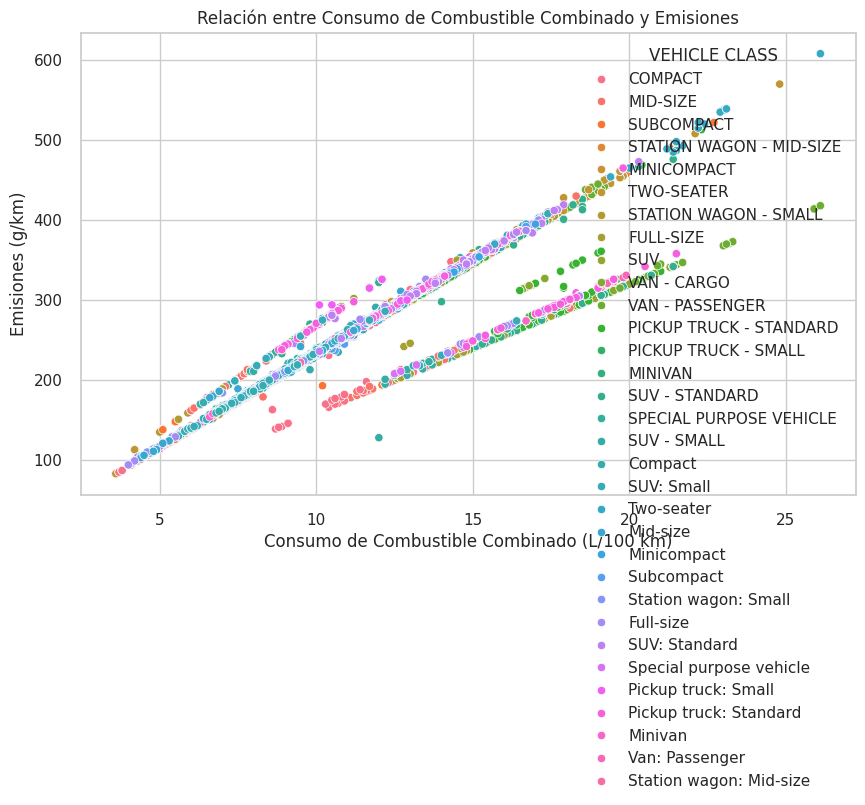

In [ ]:
# Establecer el estilo de los gráficos
sns.set(style='whitegrid')

# 1. Relación entre consumo de combustible combinado y emisiones
plt.figure(figsize=(10, 6))
sns.scatterplot(x='COMB (L/100 km)', y='EMISSIONS', hue='VEHICLE CLASS', data=datos)
plt.title('Relación entre Consumo de Combustible Combinado y Emisiones')
plt.xlabel('Consumo de Combustible Combinado (L/100 km)')
plt.ylabel('Emisiones (g/km)')
plt.show()

Se observa que sí existe una relación de combustible combinado y emisiones, dado el gráfico, se observa que a mayor consumo de combustible hay una mayor emisión. Es interesante observar que se diferencian dos líneas principales que marcan una diferencia entre los grupos de modelos, siendo este agrupamiento por tamaño relativo.

In [ ]:
# 2. Consumo de combustible promedio por clase de vehículo
plt.figure(figsize=(10, 6))
sns.barplot(x='VEHICLE CLASS', y='COMB (L/100 km)', data=datos)
plt.title('Consumo de Combustible Promedio por Clase de Vehículo')
plt.xlabel('Clase de Vehículo')
plt.ylabel('Consumo de Combustible Combinado Promedio (L/100 km)')
plt.xticks(rotation=45)
plt.show()

A simple vista, podemos ver que las clases 'COMPACT', 'MID-SIZE', y 'SUBCOMPACT' tienen los consumos promedio de combustible más bajos, indicando que son más eficientes en cuanto a combustible. En contraste, las clases con barras más altas, como 'VAN - PASSENGER', 'SUV - STANDARD', y 'PICKUP TRUCK - STANDARD', muestran consumos de combustible más elevados, sugiriendo que son menos eficientes desde el punto de vista del combustible.

El gráfico también muestra que hay una gran variación dentro de algunas clases, como 'SUV - STANDARD', 'MINICOMPACT', y 'TWO-SEATER', lo cual se evidencia por las barras de error relativamente largas.

In [ ]:
# 3. Emisiones promedio por clase de vehículo
plt.figure(figsize=(10, 6))
sns.barplot(x='VEHICLE CLASS', y='EMISSIONS', data=datos)
plt.title('Emisiones Promedio por Clase de Vehículo')
plt.xlabel('Clase de Vehículo')
plt.ylabel('Emisiones Promedio (g/km)')
plt.xticks(rotation=45)
plt.show()

Podemos observar que las clases de vehículos como 'COMPACT', 'MID-SIZE' y 'SUBCOMPACT' tienden a tener las emisiones más bajas, lo que sugiere que son más amigables con el ambiente en términos de emisiones de CO2. Por otro lado, las clases 'PICKUP TRUCK - STANDARD', 'VAN - PASSENGER' y 'SUV - STANDARD' muestran las emisiones promedio más altas, lo que indica que estos vehículos son menos eficientes en términos de emisiones. Las líneas negras verticales en la parte superior de las barras representan el error estándar o la variabilidad de las emisiones dentro de cada clase de vehículo. Barras con líneas de error más largas indican una mayor variabilidad en las emisiones dentro de esa clase de vehículo.

In [ ]:
# 4. Distribución de tamaños de motor
plt.figure(figsize=(10, 6))
sns.histplot(datos['ENGINE SIZE'], bins=10, kde=True)
plt.title('Distribución de Tamaños de Motor')
plt.xlabel('Tamaño del Motor (litros)')
plt.ylabel('Frecuencia')
plt.show()

Las barras del histograma indican la cantidad de vehículos que tienen un motor de cierto tamaño, y la línea de densidad proporciona una estimación suavizada de la distribución. Observando el histograma, parece que hay picos notables en torno a motores de 2 litros, 3-3.5 litros y otro pico menos pronunciado cerca de los 4.5 litros. Además, hay una cantidad significativa de vehículos con motores más pequeños, entre 1 y 2 litros.

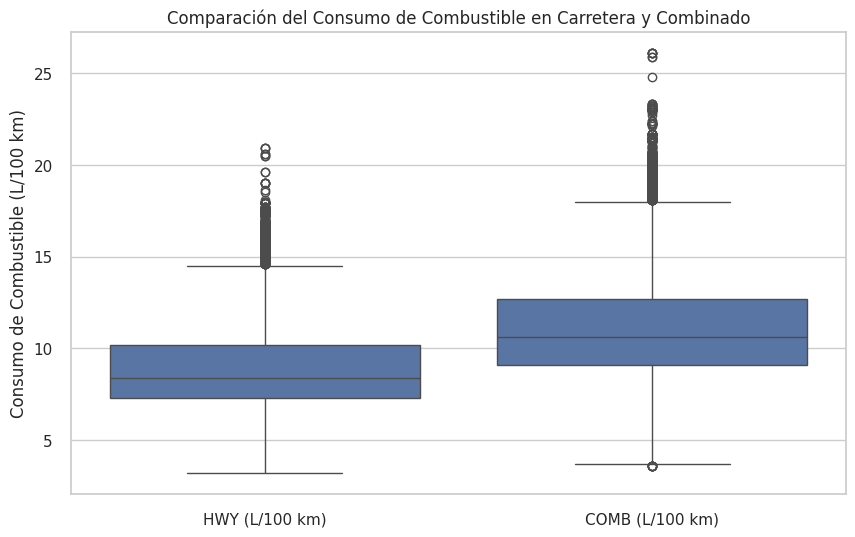

In [ ]:
# 5. Comparación del consumo de combustible en carretera y combinado
plt.figure(figsize=(10, 6))
data_melted = datos.melt(value_vars=['HWY (L/100 km)', 'COMB (L/100 km)'], var_name='Type', value_name='Fuel Consumption')
sns.boxplot(x='Type', y='Fuel Consumption', data=data_melted)
plt.title('Comparación del Consumo de Combustible en Carretera y Combinado')
plt.xlabel('')
plt.ylabel('Consumo de Combustible (L/100 km)')
plt.show()

De lo que podemos observar en el gráfico:
- La mediana del consumo en carretera (HWY) es más baja que la mediana del consumo combinado (COMB), lo que es de esperar, ya que generalmente los vehículos son más eficientes en carretera que en un escenario combinado de carretera y ciudad.
- La distribución del consumo en carretera es más estrecha (la caja es más corta), lo que sugiere que los valores son menos dispersos en comparación con el consumo combinado.
- Hay muchos valores atípicos tanto para el consumo en carretera como para el consumo combinado, indicando que hay algunos vehículos que son mucho menos eficientes que la mayoría.
- La caja del consumo combinado es más larga, lo que indica una mayor variabilidad en el consumo de combustible en esta categoría.

### Correlación entre variables

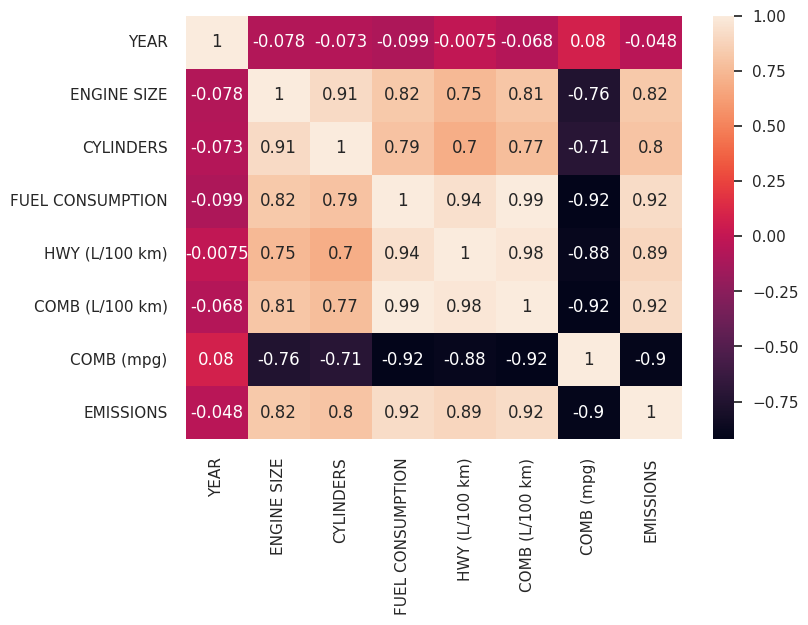

In [ ]:
matriz_correlacion = datos[datos.select_dtypes(include='number').columns.to_list()].corr()
sns.heatmap(matriz_correlacion, annot=True)
plt.show()

Análisis:
- Existe una correlación positiva muy alta entre el tamaño de motor y el número de cilindros.
- Existe una correlación positiva alta entre tamaño de motor y emisiones, así como entre el número de cilindros y emisiones producidas.
- Existe una alta correlación positiva entre el consumo en carreta con el consumo combinado, así como entre el consumo en ciudad y el consumo combinado.
- Existe una correlación positiva fuerte entre el consumo de combustible y las emisiones.
- Existe una correlación positiva entre el consumo de combustible en todas sus denominaciones, y el tamaño del motor. De la misma manera que con el número de cilindros.

### Puntos atípicos

In [ ]:
# Calcular el Q1 y Q3
Q1 = datos.quantile(0.25)
Q3 = datos.quantile(0.75)
IQR = Q3 - Q1

# Identificar los outliers
outliers = ((datos < (Q1 - 1.5 * IQR)) | (datos > (Q3 + 1.5 * IQR)))

columns = datos.select_dtypes(include='number').columns.to_list()
columns.remove('YEAR')

# Puntos atipicos y valor de la columna VEHICLE CLASS
for column in columns:
    if outliers[column].any():
        print(f"Outliers en '{column}':")
        subset = datos.loc[outliers[column], [column, 'VEHICLE CLASS']]
        print(subset)
        

Outliers en 'ENGINE SIZE':
       ENGINE SIZE            VEHICLE CLASS
207            8.0               SUBCOMPACT
208            8.0               SUBCOMPACT
867            8.0               TWO-SEATER
868            8.0               TWO-SEATER
1568           8.0               TWO-SEATER
1569           8.0               TWO-SEATER
2259           8.3               TWO-SEATER
2306           8.3               TWO-SEATER
3155           8.3               TWO-SEATER
4099           8.3  PICKUP TRUCK - STANDARD
4100           8.3  PICKUP TRUCK - STANDARD
4104           8.3               TWO-SEATER
5117           8.3  PICKUP TRUCK - STANDARD
5118           8.3  PICKUP TRUCK - STANDARD
5119           8.3               TWO-SEATER
5120           8.3               TWO-SEATER
7166           8.4               TWO-SEATER
7167           8.4               TWO-SEATER
8237           8.4               TWO-SEATER
8238           8.4               TWO-SEATER
9114           8.0               TWO-SEATER
9301 

Los puntos atípicos sobre las variables cuantitativas se deben a registros de autos menos comúnes, en su mayoría autos de menor tamaño como lo son los de clase TWO-SEATER y SUBCOMPACT. La característica de su tamaño reducido tiene influencia sobre cada una de las variables como el tamaño del motor, el número de cilindros, el consumo de combustible, etc. Por esta razón se alejan del rango intercuartílico y son considerados outliers.

### Variables categóricas

#### Gráficos de barra, Tablas de frecuencia y de proporciones

Tabla de frecuencia para YEAR:
YEAR
2015    1132
2016    1110
2009    1092
2018    1083
2012    1081
2008    1079
2011    1076
2017    1058
2013    1058
2019    1056
2007    1043
2014    1040
2010    1021
2005    1019
2020     968
2006     968
2022     955
2021     941
2004     898
2003     820
2002     740
2001     679
2000     639
Name: count, dtype: int64

Tabla de proporciones para YEAR:
YEAR
2015    0.050186
2016    0.049211
2009    0.048413
2018    0.048014
2012    0.047925
2008    0.047836
2011    0.047703
2017    0.046905
2013    0.046905
2019    0.046817
2007    0.046240
2014    0.046107
2010    0.045265
2005    0.045176
2020    0.042915
2006    0.042915
2022    0.042339
2021    0.041718
2004    0.039812
2003    0.036354
2002    0.032807
2001    0.030103
2000    0.028329
Name: proportion, dtype: float64



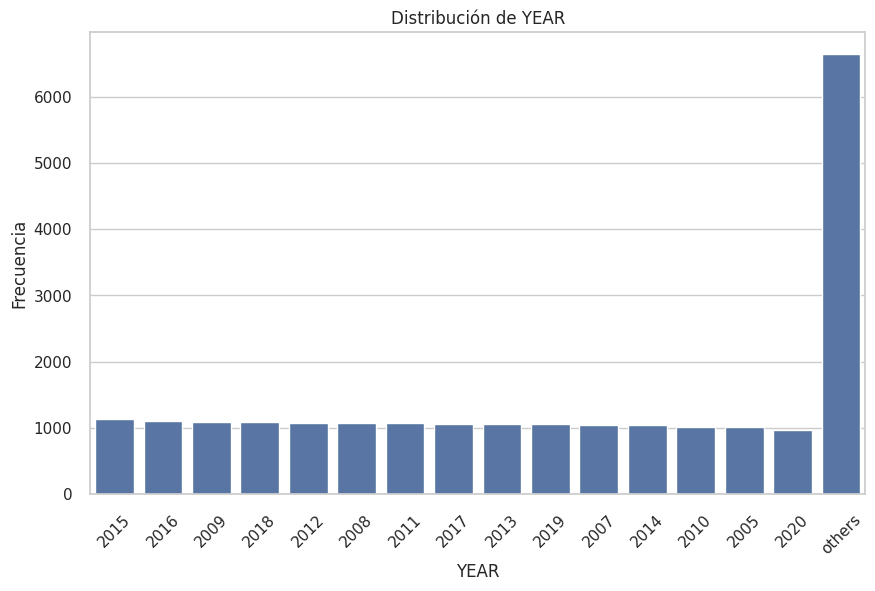

Tabla de frecuencia para MAKE:
MAKE
CHEVROLET        1725
BMW              1490
GMC              1357
FORD             1276
MERCEDES-BENZ     935
                 ... 
ALFA ROMEO          8
SRT                 4
GENESIS             4
BUGATTI             3
PLYMOUTH            2
Name: count, Length: 87, dtype: int64

Tabla de proporciones para MAKE:
MAKE
CHEVROLET        0.076476
BMW              0.066058
GMC              0.060161
FORD             0.056570
MERCEDES-BENZ    0.041452
                   ...   
ALFA ROMEO       0.000355
SRT              0.000177
GENESIS          0.000177
BUGATTI          0.000133
PLYMOUTH         0.000089
Name: proportion, Length: 87, dtype: float64



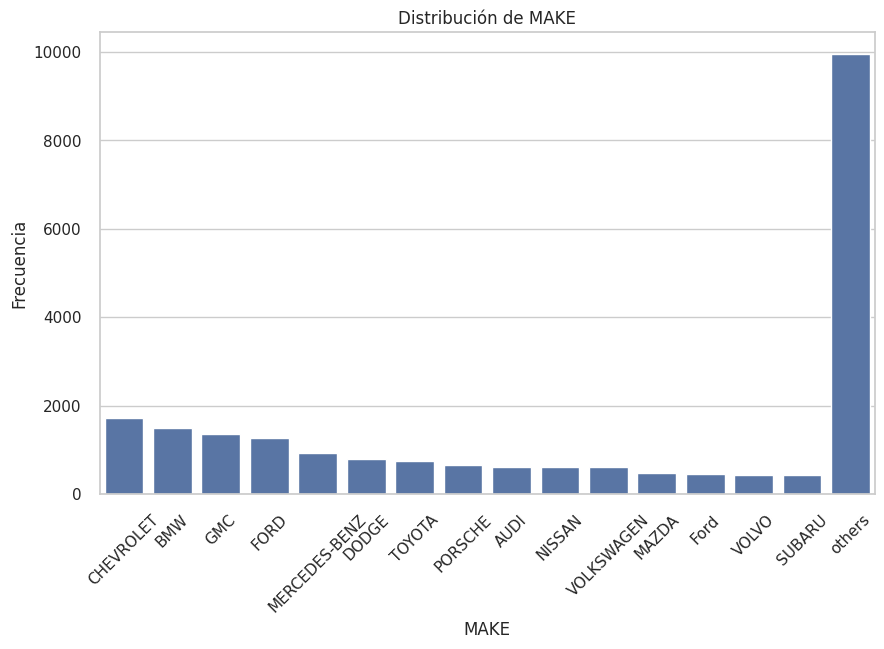

Tabla de frecuencia para VEHICLE CLASS:
VEHICLE CLASS
SUV                         2640
COMPACT                     2636
MID-SIZE                    2300
PICKUP TRUCK - STANDARD     1689
SUBCOMPACT                  1559
FULL-SIZE                   1086
TWO-SEATER                   999
SUV: Small                   929
SUV - SMALL                  827
MINICOMPACT                  783
STATION WAGON - SMALL        737
Mid-size                     660
SUV: Standard                608
Pickup truck: Standard       515
SUV - STANDARD               514
Compact                      491
Subcompact                   451
Full-size                    417
PICKUP TRUCK - SMALL         403
MINIVAN                      366
STATION WAGON - MID-SIZE     343
VAN - CARGO                  332
Two-seater                   313
VAN - PASSENGER              287
Minicompact                  211
Station wagon: Small         140
Pickup truck: Small          108
Special purpose vehicle       62
SPECIAL PURPOSE VEHICL

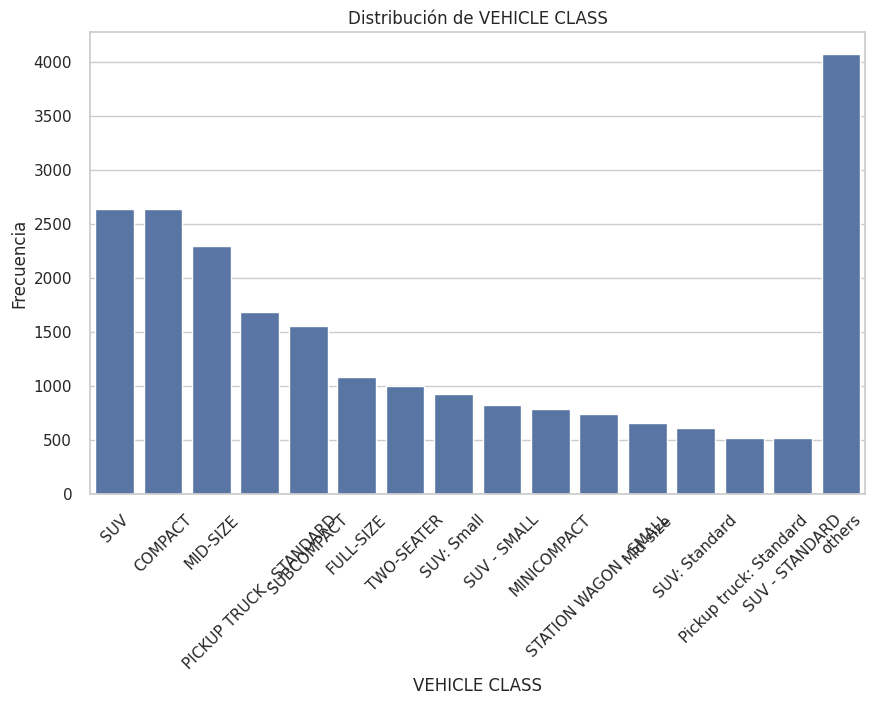

Tabla de frecuencia para ENGINE SIZE:
ENGINE SIZE
2.0    3020
3.0    2070
2.5    1506
3.5    1467
5.3    1230
       ... 
2.1       5
0.9       3
6.3       3
0.8       3
4.1       1
Name: count, Length: 63, dtype: int64

Tabla de proporciones para ENGINE SIZE:
ENGINE SIZE
2.0    0.133889
3.0    0.091772
2.5    0.066767
3.5    0.065038
5.3    0.054531
         ...   
2.1    0.000222
0.9    0.000133
6.3    0.000133
0.8    0.000133
4.1    0.000044
Name: proportion, Length: 63, dtype: float64



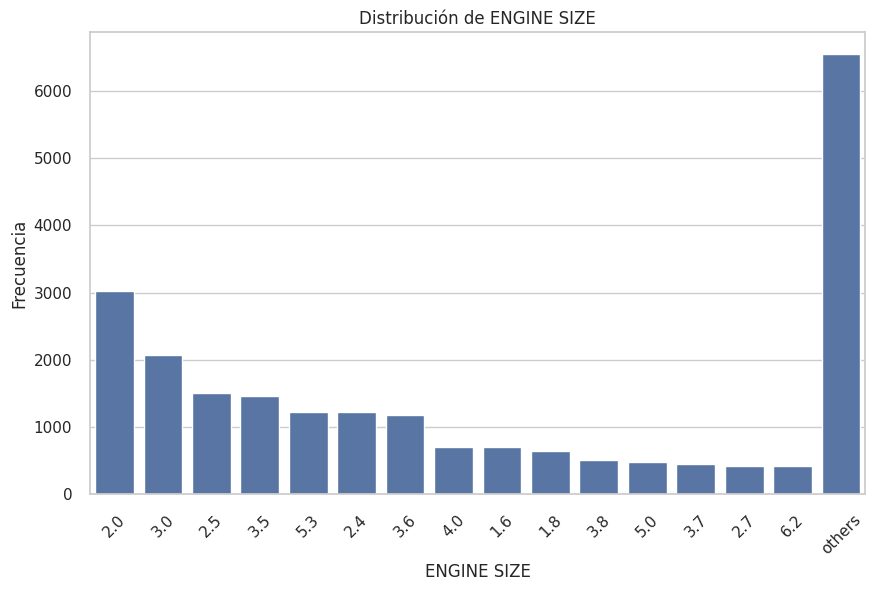

Tabla de frecuencia para CYLINDERS:
CYLINDERS
4     8049
6     8021
8     5187
5      499
12     451
10     162
3      159
2       16
16      12
Name: count, dtype: int64

Tabla de proporciones para CYLINDERS:
CYLINDERS
4     0.356845
6     0.355604
8     0.229961
5     0.022123
12    0.019995
10    0.007182
3     0.007049
2     0.000709
16    0.000532
Name: proportion, dtype: float64



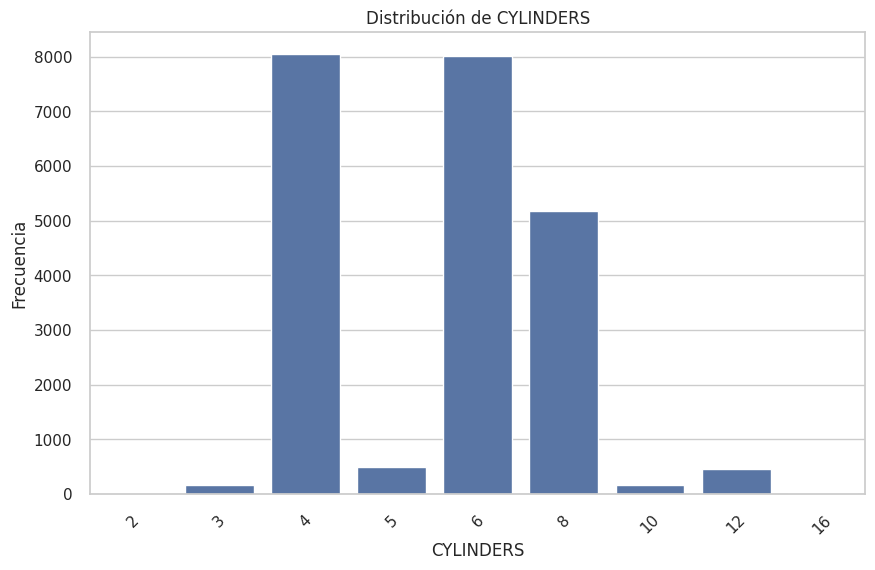

Tabla de frecuencia para TRANSMISSION:
TRANSMISSION
A4      3519
AS6     2834
M6      2609
M5      2104
A6      1965
AS8     1733
A5      1420
AS5      865
AV       816
A8       794
AM7      689
AS7      614
A9       529
AS10     335
A7       278
AS4      245
AM6      214
AM8      164
A10      162
AV7      143
AV6      137
M7       130
AS9      110
AV8       78
AV10      25
A3        24
AV1        8
AM5        6
AM9        5
M4         1
Name: count, dtype: int64

Tabla de proporciones para TRANSMISSION:
TRANSMISSION
A4      0.156012
AS6     0.125643
M6      0.115668
M5      0.093279
A6      0.087117
AS8     0.076831
A5      0.062954
AS5     0.038349
AV      0.036177
A8      0.035201
AM7     0.030546
AS7     0.027221
A9      0.023453
AS10    0.014852
A7      0.012325
AS4     0.010862
AM6     0.009487
AM8     0.007271
A10     0.007182
AV7     0.006340
AV6     0.006074
M7      0.005763
AS9     0.004877
AV8     0.003458
AV10    0.001108
A3      0.001064
AV1     0.000355
AM5     0.000266
A

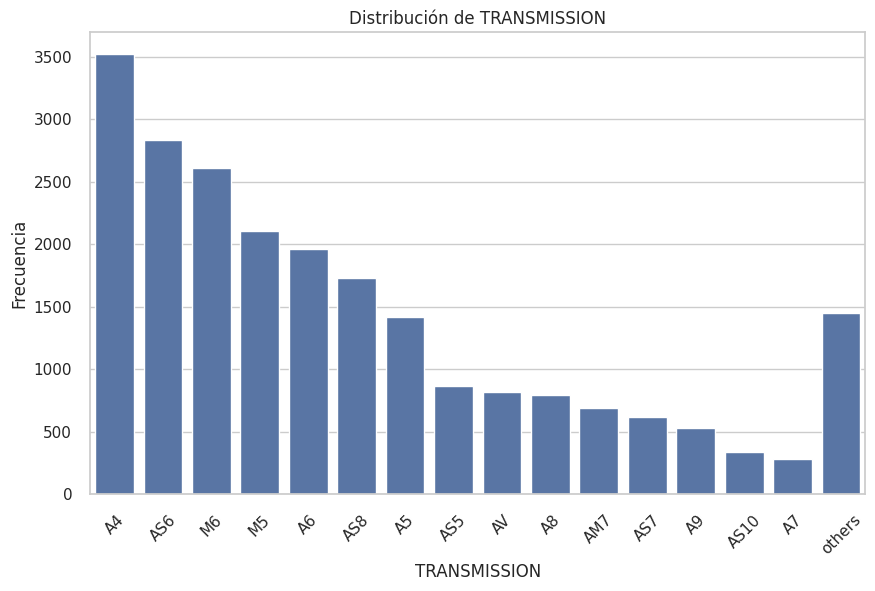

Tabla de frecuencia para FUEL:
FUEL
X    11822
Z     9316
E     1071
D      314
N       33
Name: count, dtype: int64

Tabla de proporciones para FUEL:
FUEL
X    0.524118
Z    0.413016
E    0.047482
D    0.013921
N    0.001463
Name: proportion, dtype: float64



In [ ]:
# Lista de variables categóricas
categorical_variables = ['YEAR','MAKE', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS','TRANSMISSION', 'FUEL']

# Para cada variable categórica
for variable in categorical_variables:
    # Tabla de frecuencia
    freq_table = datos[variable].value_counts()
    print(f'Tabla de frecuencia para {variable}:\n{freq_table}\n')

    # Tabla de proporciones
    prop_table = datos[variable].value_counts(normalize=True)
    print(f'Tabla de proporciones para {variable}:\n{prop_table}\n')

    #Si hay mas de 15 registros:
    if len(freq_table) > 15:
        # Tomar los primeros 15 registros
        top_15 = freq_table.iloc[:15]
        
        # Sumar las frecuencias del resto
        others_sum = freq_table.iloc[15:].sum()
        
        # Crear una nueva serie con los primeros 15 registros y "others"
        new_freq_table = pd.concat([top_15,pd.Series([others_sum], index=['others'])])
    else:
        #Si no hay mas de 15, se queda como está
        new_freq_table = freq_table
    
    # Gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.barplot(x=new_freq_table.index, y=new_freq_table.values)
    plt.title(f'Distribución de {variable}')
    plt.ylabel('Frecuencia')
    plt.xlabel(variable)
    plt.xticks(rotation=45)
    plt.show()


### Tendencia al agrupamiento

In [ ]:
Y = np.array(datos[['MAKE']])

columns = datos.select_dtypes(include='number').columns.to_list()
columns.remove('YEAR')
# print(columns)
X = np.array(datos[columns])
X.shape

(22556, 7)

In [ ]:
print(columns)

['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'HWY (L/100 km)', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']


In [ ]:
random.seed(123)
X_scale=sklearn.preprocessing.scale(X)

pyclustertend.hopkins(X,len(X))

0.0027119035071000463

El valor es cercano a cero y menor a 0.5, por lo que los datos no son aleatorios y hay altas probabilidades de que el agrupamiento sea factible

### Numero de grupos

Elbow Score Plot (distortion metric):
elbow value = optimal k: 5  | elbow score: 7,211,358.345


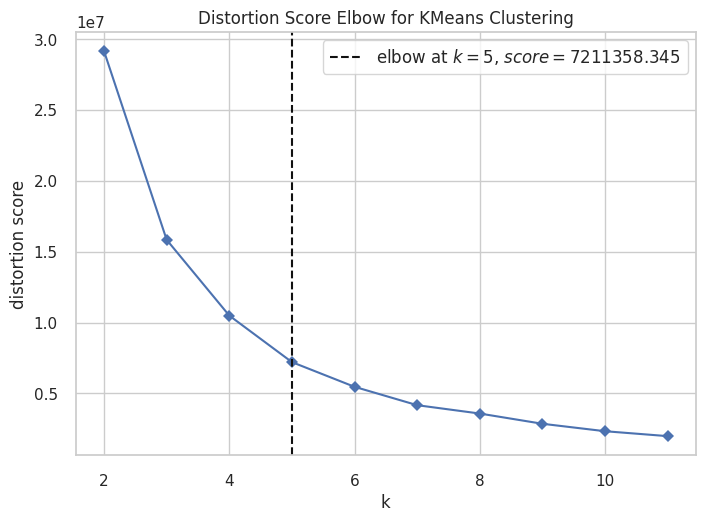

Elbow Score Plot (silhouette metric):
elbow value = optimal k: 2  | elbow score: 0.575


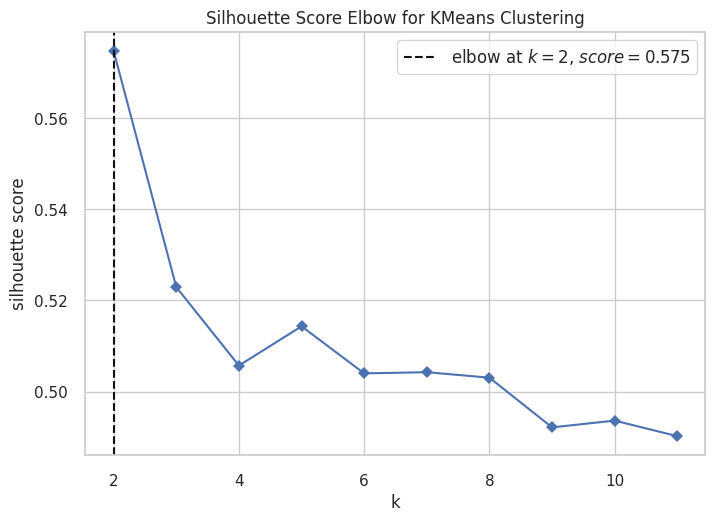

Elbow Score Plot (calinski_harabasz metric):
elbow value = optimal k: 7  | elbow score: 69,546.952


In [ ]:
# elbow score plot with Yellowbrick
nK = 12    
RNDN = 42    

def elbowplot(df, elbowmetric, model):
    print("Elbow Score Plot (" + str(elbowmetric) + " metric):")
    vis = KElbowVisualizer(
        model, 
        k=(2, nK), 
        metric=elbowmetric,
        locate_elbow=True, 
        timings=False)
    vis.fit(df)      
    print("elbow value = optimal k:", f'{vis.elbow_value_:.0f}', \
            " | elbow score:", f'{vis.elbow_score_:,.3f}')
    vis.show()  

# call elbow plot for each of 3 alternative metrics
# distortion = mean sum of squared distances to center
# silhouette = mean ratio of intra-cluster and nearest-cluster distance
# calinski = ratio of within to between cluster dispersion

model = KMeans(random_state=RNDN)
_ = [elbowplot(X, m, model) for m in ["distortion", "silhouette", "calinski_harabasz"]]


### Clustering Jerárquico

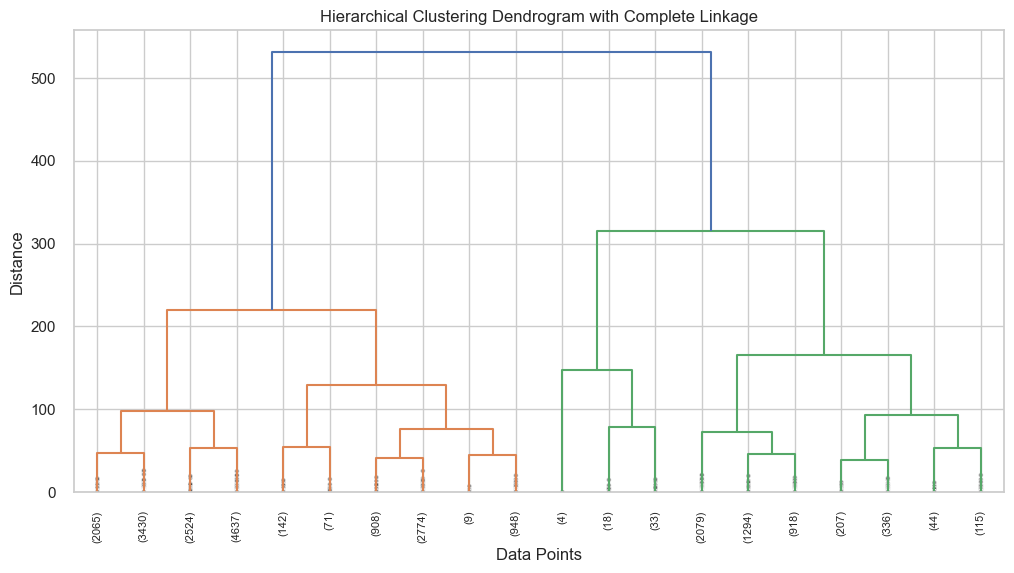

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform hierarchical clustering with complete linkage
linkage_matrix = linkage(X, method='complete', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=8., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
# Create an Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=5)

# Fit the model to the data and get cluster labels
cluster_labels = agg_cluster.fit_predict(X)

# Plot the data with cluster labels
plt.scatter(X[:, 0], X[:, -1], c=cluster_labels, cmap='viridis')
plt.title(f'Agglomerative Clustering with {5} Clusters')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')  # Update the y-axis label to indicate the last column
plt.colorbar(label='Cluster')
plt.show()

El coeficiente de silueta promedio para 5 clusters es: 0.4987773370040373


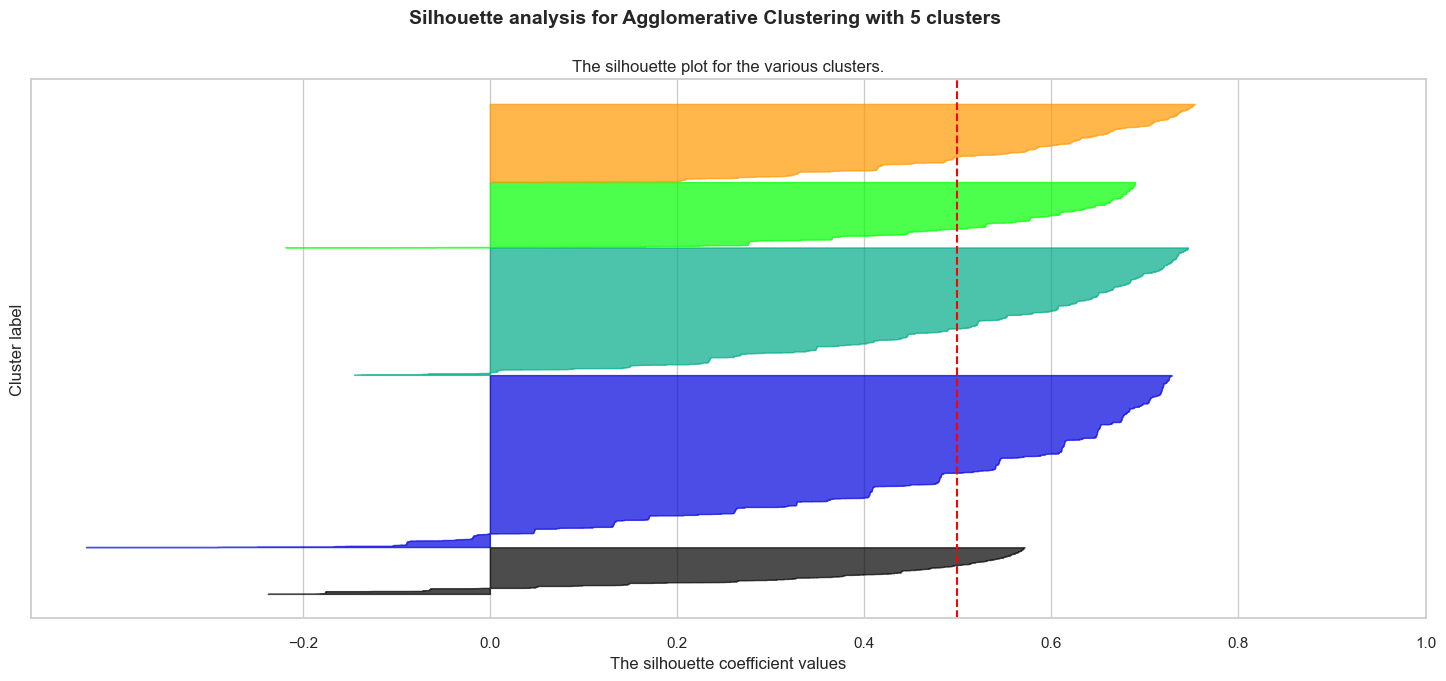

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm


silhouette_avg = silhouette_score(X, cluster_labels)
print(f"El coeficiente de silueta promedio para {5} clusters es: {silhouette_avg}")

sample_silhouette_values = silhouette_samples(X, cluster_labels)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

y_lower = 10
for i in range(5):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 5)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")


ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])
ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.suptitle(f"Silhouette analysis for Agglomerative Clustering with {5} clusters",
             fontsize=14, fontweight='bold')

plt.show()

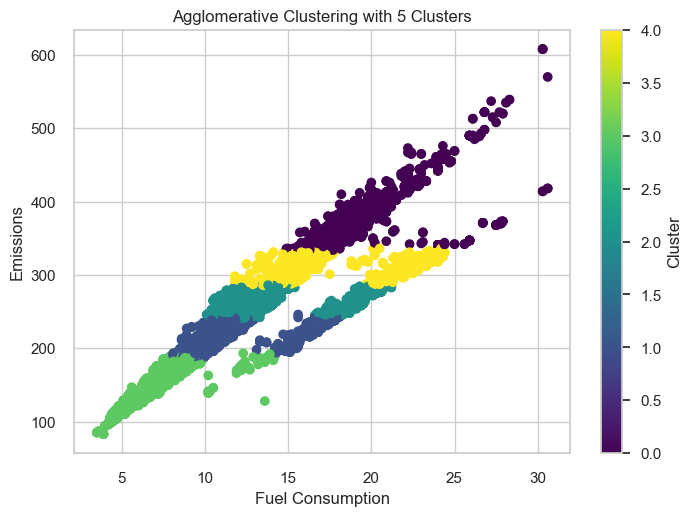

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
# Create an Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=5)

# Fit the model to the data and get cluster labels
cluster_labels = agg_cluster.fit_predict(X)

# Plot the data with cluster labels
plt.scatter(X[:, 2], X[:, -1], c=cluster_labels, cmap='viridis')
plt.title(f'Agglomerative Clustering with {5} Clusters')
plt.xlabel('Fuel Consumption')
plt.ylabel('Emissions')  # Update the y-axis label to indicate the last column
plt.colorbar(label='Cluster')
plt.show()

El coeficiente de silueta promedio para 5 clusters es: 0.4987773370040373


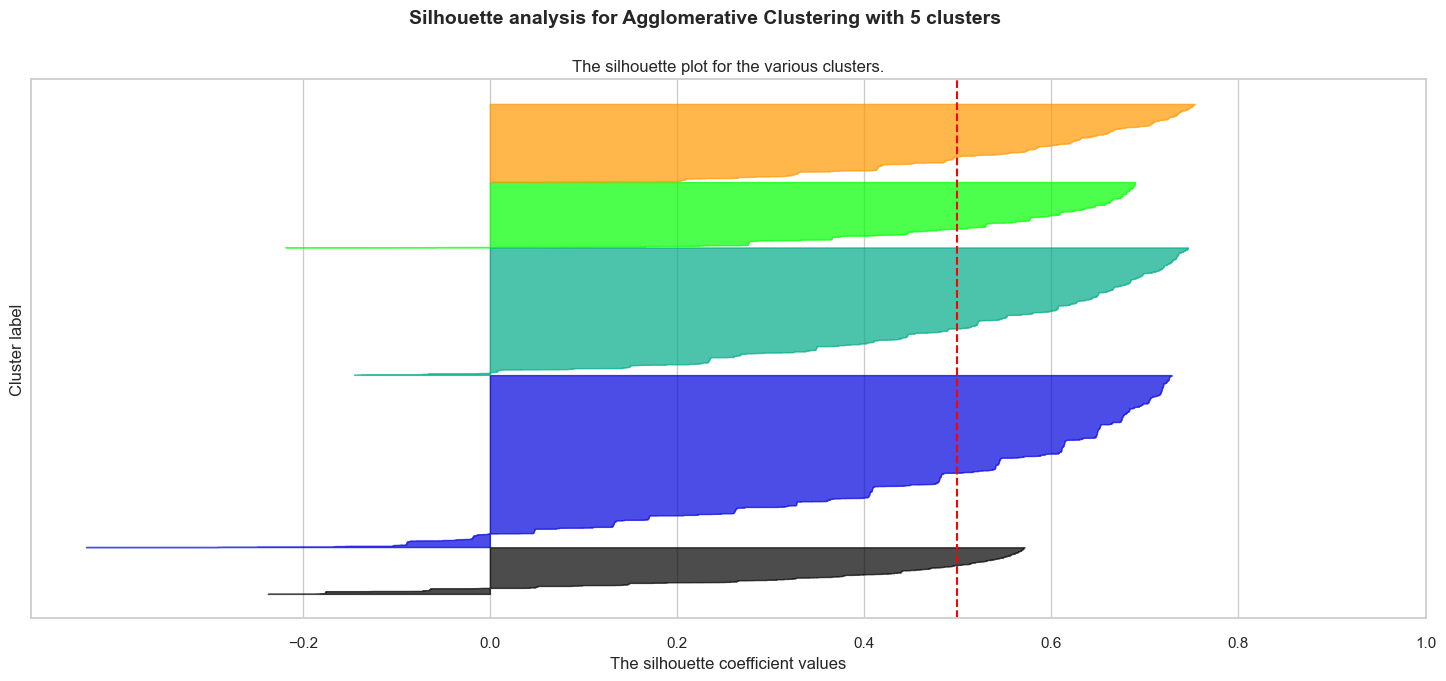

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm


silhouette_avg = silhouette_score(X, cluster_labels)
print(f"El coeficiente de silueta promedio para {5} clusters es: {silhouette_avg}")

sample_silhouette_values = silhouette_samples(X, cluster_labels)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

y_lower = 10
for i in range(5):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 5)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")


ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])
ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.suptitle(f"Silhouette analysis for Agglomerative Clustering with {5} clusters",
             fontsize=14, fontweight='bold')

plt.show()

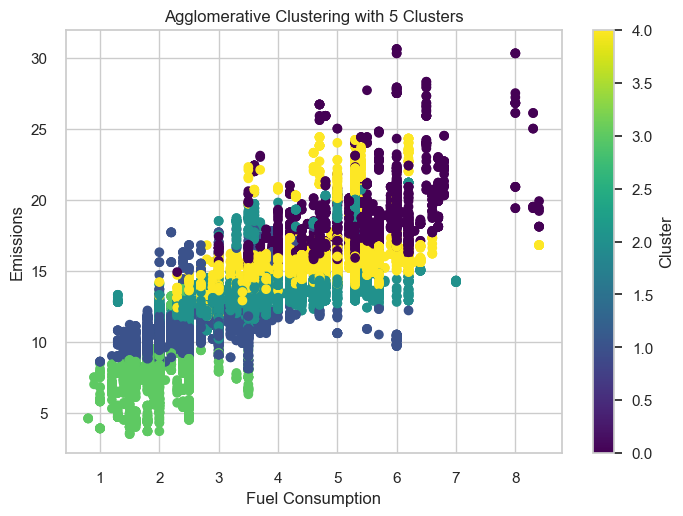

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
# Create an Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=5)

# Fit the model to the data and get cluster labels
cluster_labels = agg_cluster.fit_predict(X)

# Plot the data with cluster labels
plt.scatter(X[:, 0], X[:, 2], c=cluster_labels, cmap='viridis')
plt.title(f'Agglomerative Clustering with {5} Clusters')
plt.xlabel('Fuel Consumption')
plt.ylabel('Emissions')  # Update the y-axis label to indicate the last column
plt.colorbar(label='Cluster')
plt.show()

El coeficiente de silueta promedio para 5 clusters es: 0.4987773370040373


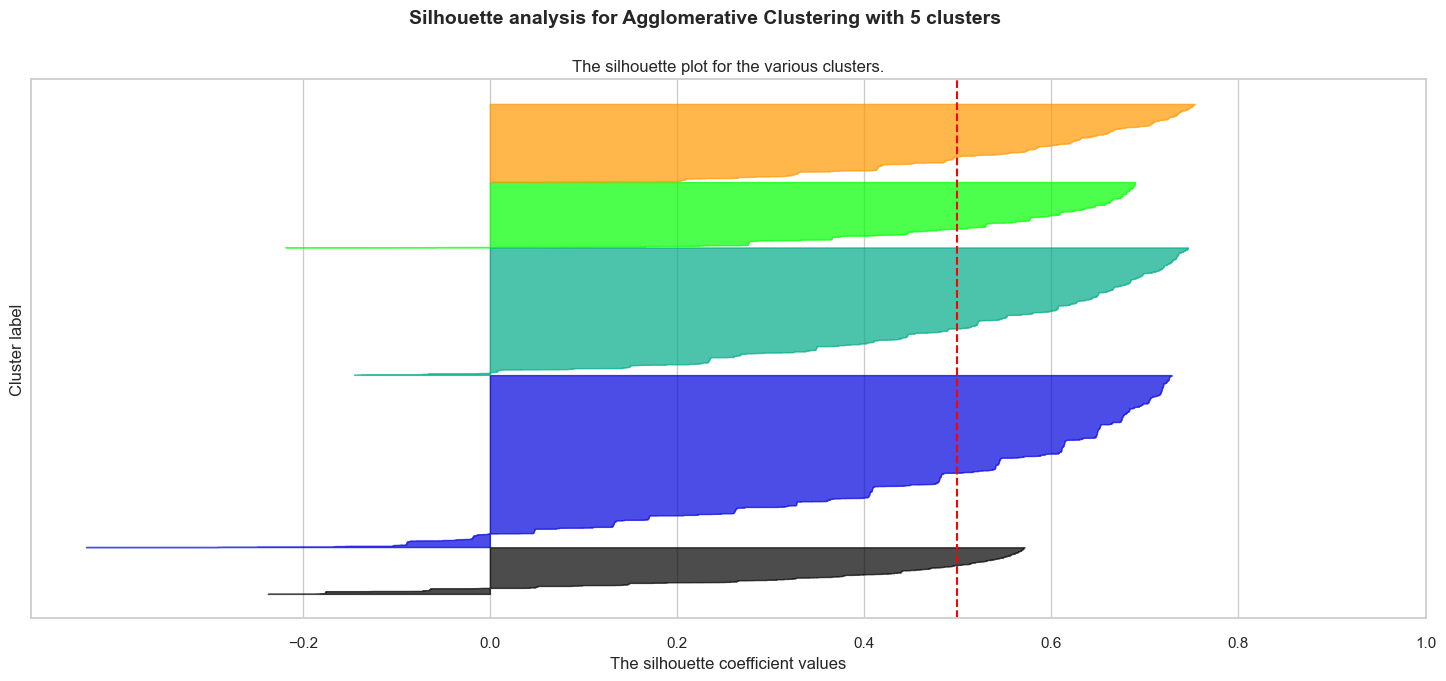

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm


silhouette_avg = silhouette_score(X, cluster_labels)
print(f"El coeficiente de silueta promedio para {5} clusters es: {silhouette_avg}")

sample_silhouette_values = silhouette_samples(X, cluster_labels)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

y_lower = 10
for i in range(5):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 5)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")


ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])
ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.suptitle(f"Silhouette analysis for Agglomerative Clustering with {5} clusters",
             fontsize=14, fontweight='bold')

plt.show()

### Fuzzy C-Means

In [ ]:
import numpy as np
from fcmeans import FCM # is inside the fuzzy-c-means installation
from matplotlib import pyplot as plt

fcm = FCM(n_clusters=5)
fcm.fit(X)

# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)
plt.scatter(X[:, 0], X[:, -1], c=fcm_labels, s=40,cmap="viridis")
plt.title(f'Fuzzy C-Means with {5} Clusters')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')  # Update the y-axis label to indicate the last column
plt.colorbar(label='Cluster')
plt.show()

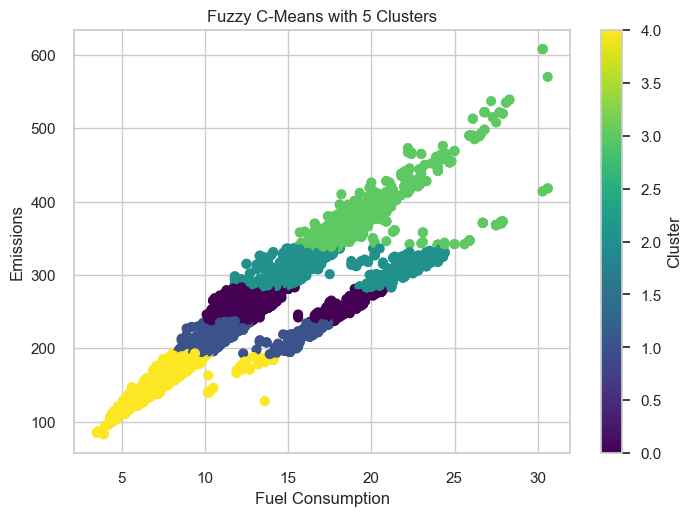

In [ ]:
plt.scatter(X[:, 2], X[:, -1], c=fcm_labels, s=40,cmap="viridis")
plt.title(f'Fuzzy C-Means with {5} Clusters')
plt.xlabel('Fuel Consumption')
plt.ylabel('Emissions')  # Update the y-axis label to indicate the last column
plt.colorbar(label='Cluster')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5705698336369217
For n_clusters = 5 The average silhouette_score is : 0.513016433917016
For n_clusters = 7 The average silhouette_score is : 0.498479982515444


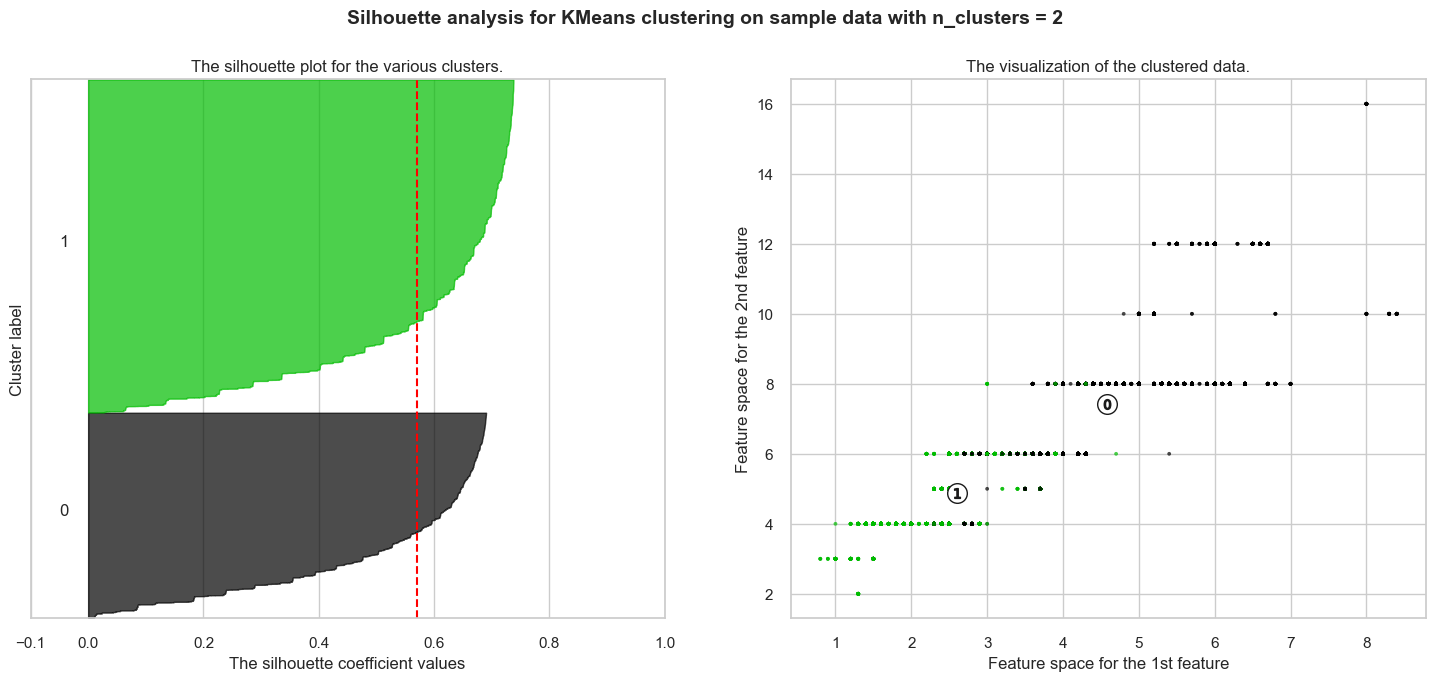

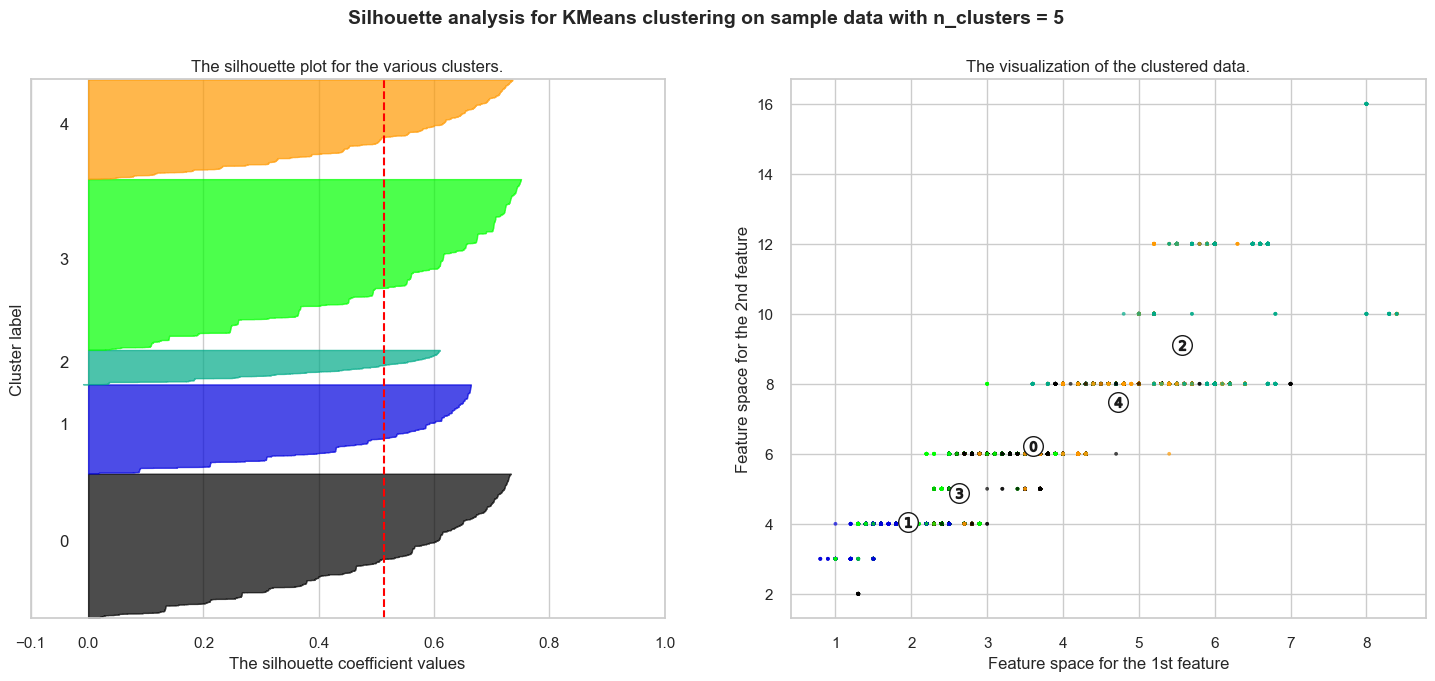

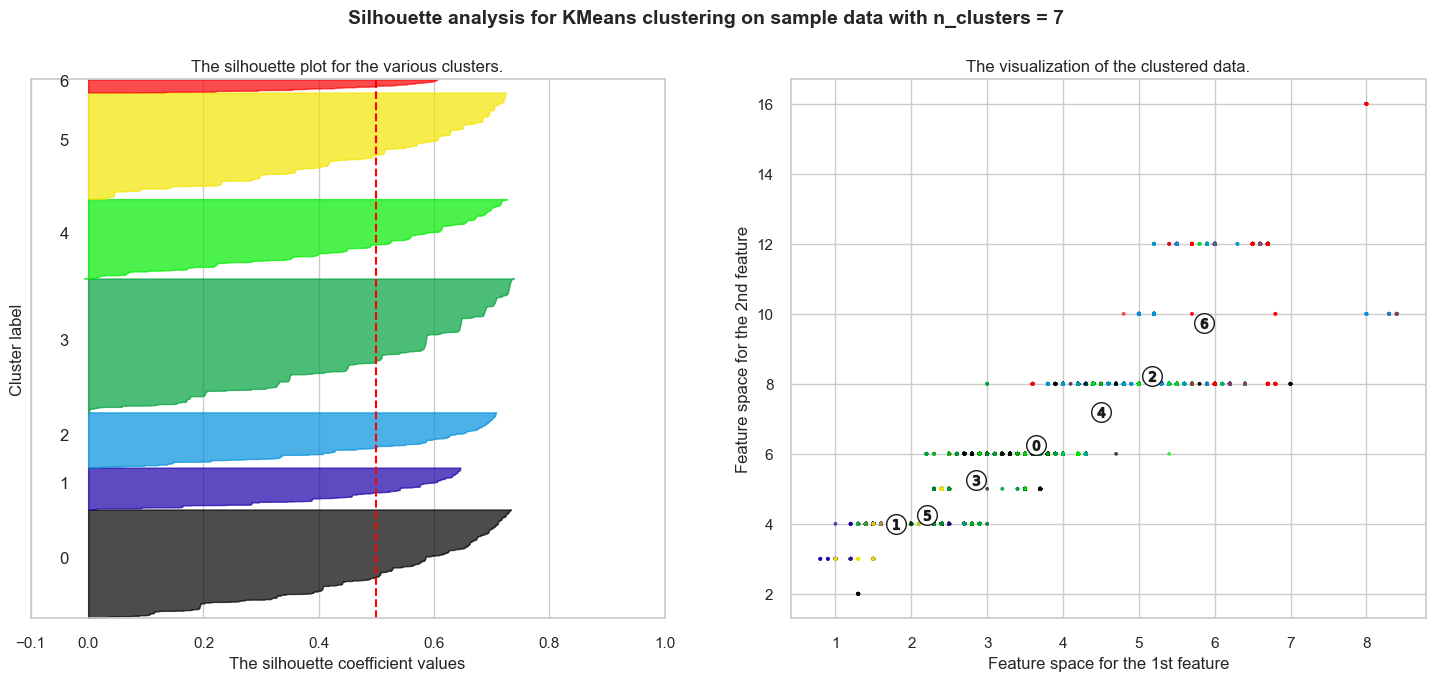

In [ ]:
range_n_clusters = [2,5,7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### KMeans

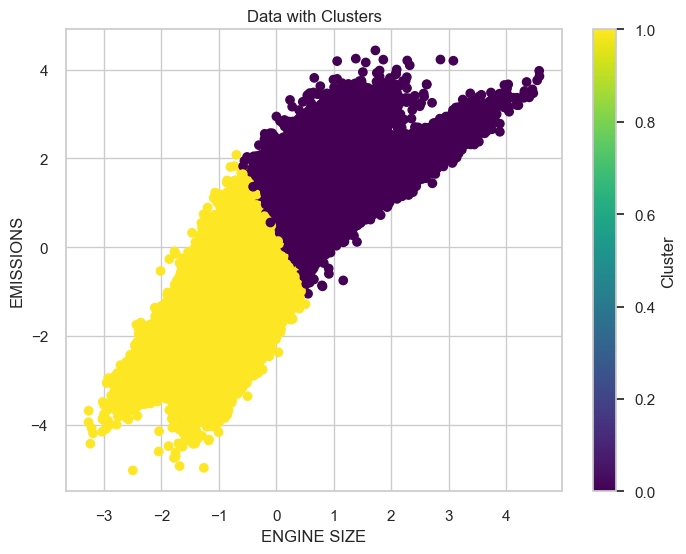

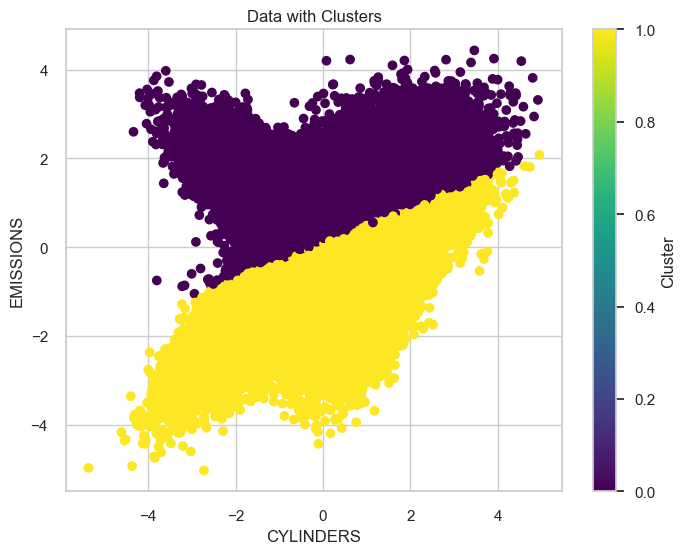

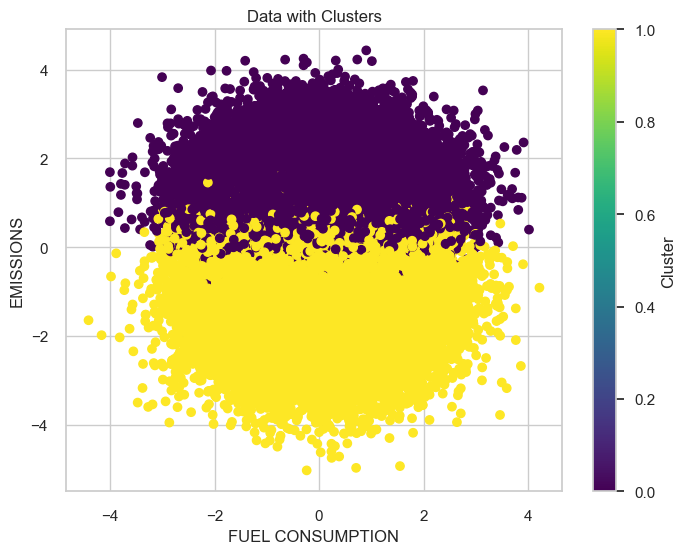

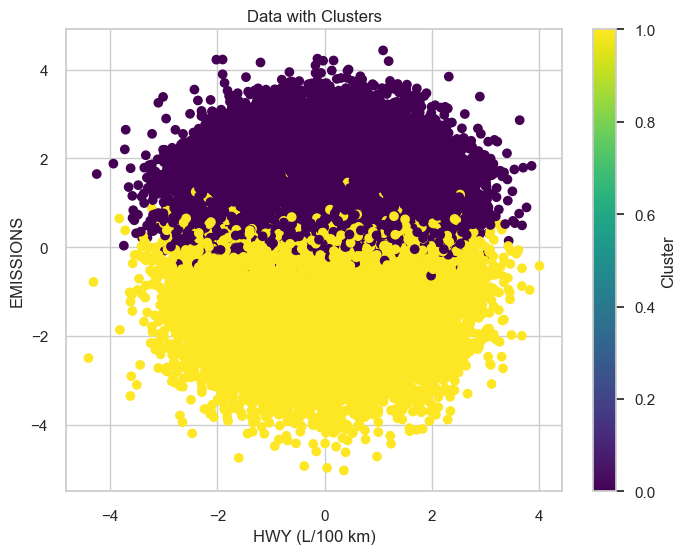

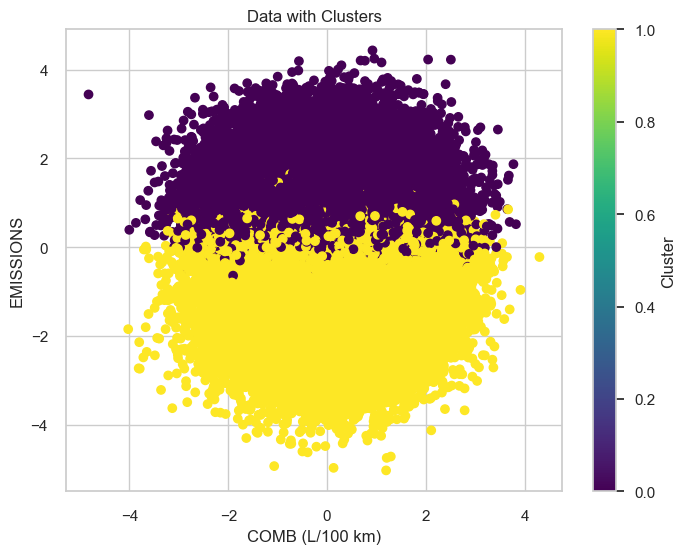

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
# For 2 clusters
# Generate data
X, y = make_classification(n_samples=100000, n_features=len(columns), random_state=42)

# Create a K-Means clustering model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to your data
cluster_labels = kmeans.fit_predict(X)

for index in range(0, len(columns)-1):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, index], X[:, -1], c=cluster_labels, cmap='viridis')
    plt.xlabel(columns[index])
    plt.ylabel(columns[-1])
    plt.title('Data with Clusters')
    plt.colorbar(label='Cluster')
    plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"El coeficiente de silueta promedio es: {silhouette_avg}")

sample_silhouette_values = silhouette_samples(X, cluster_labels)
n_clusters = len(np.unique(cluster_labels))

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for the 0 samples

plt.title("The silhouette plot for the various clusters.")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")

plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

El coeficiente de silueta promedio es: 0.24667518011283734


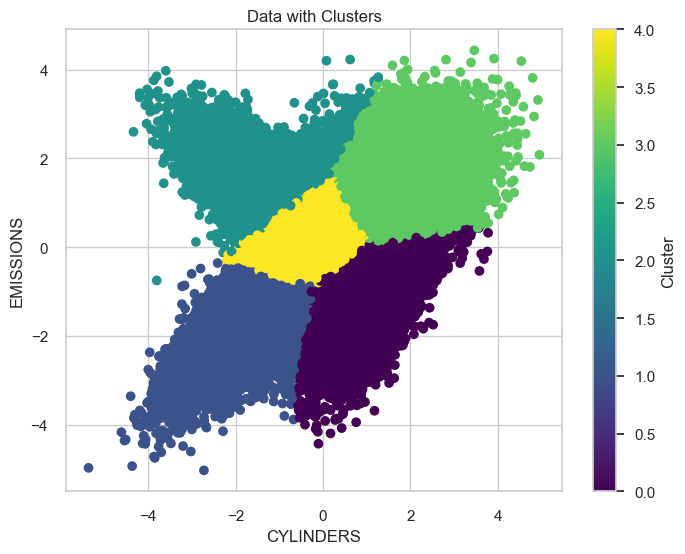

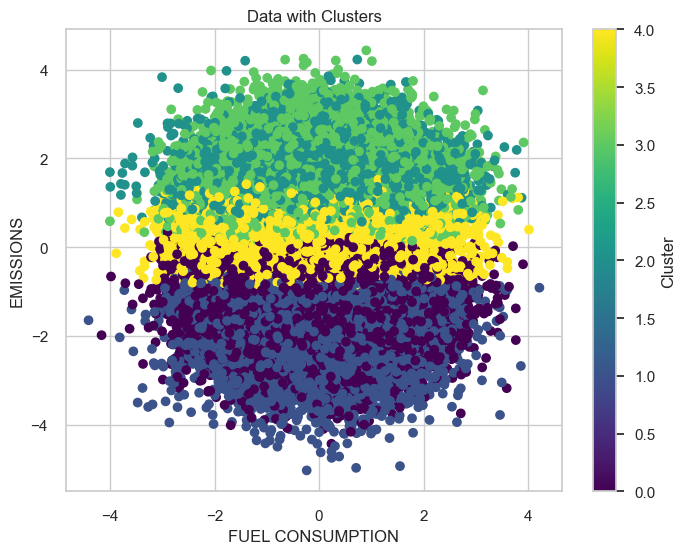

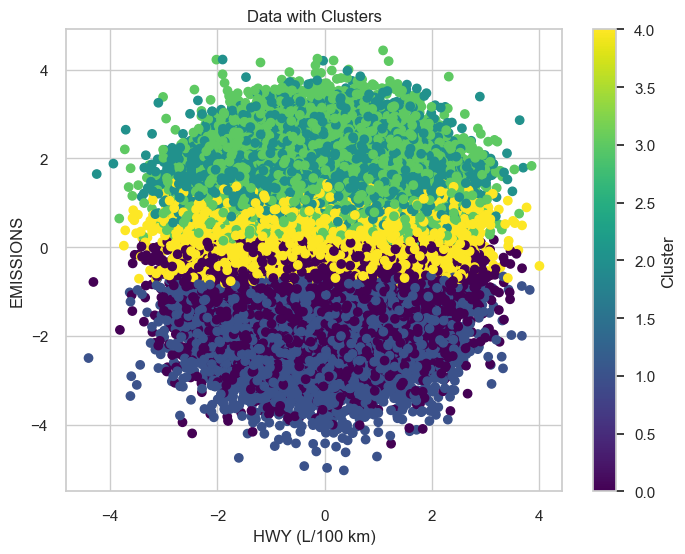

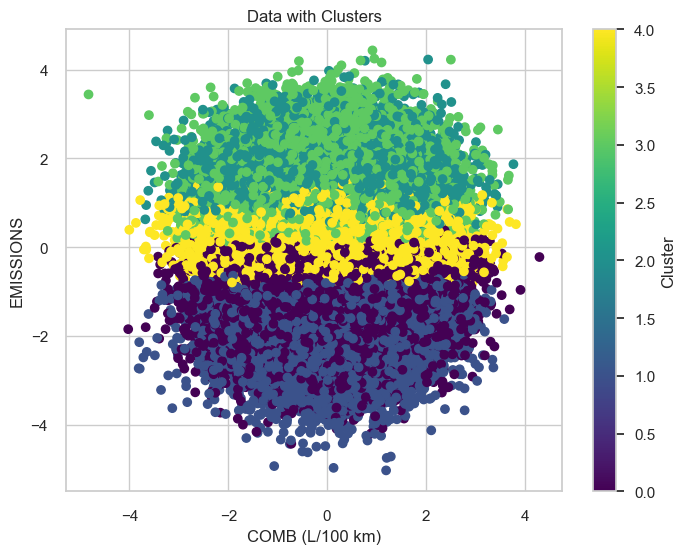

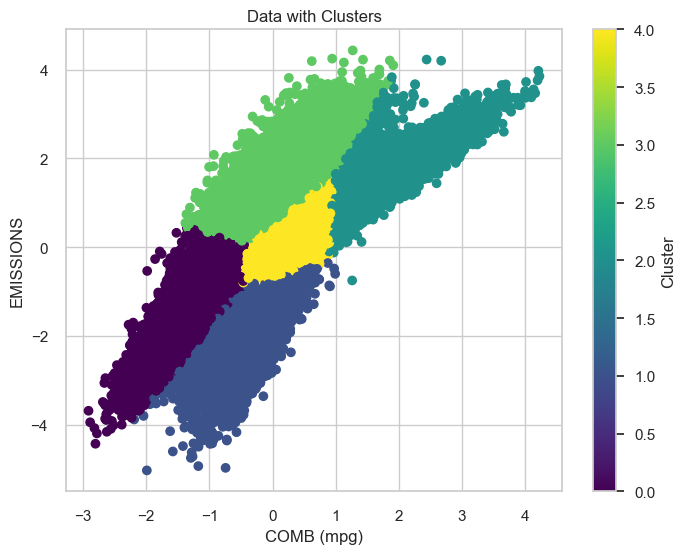

In [ ]:
# For 5 clusters
# Generate data
X, y = make_classification(n_samples=100000, n_features=len(columns), random_state=42)

# Create a K-Means clustering model
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to your data
cluster_labels = kmeans.fit_predict(X)

for index in range(0, len(columns)-1):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, index], X[:, -1], c=cluster_labels, cmap='viridis')
    plt.xlabel(columns[index])
    plt.ylabel(columns[-1])
    plt.title('Data with Clusters')
    plt.colorbar(label='Cluster')
    plt.show()

El coeficiente de silueta promedio es: 0.1658118221712651


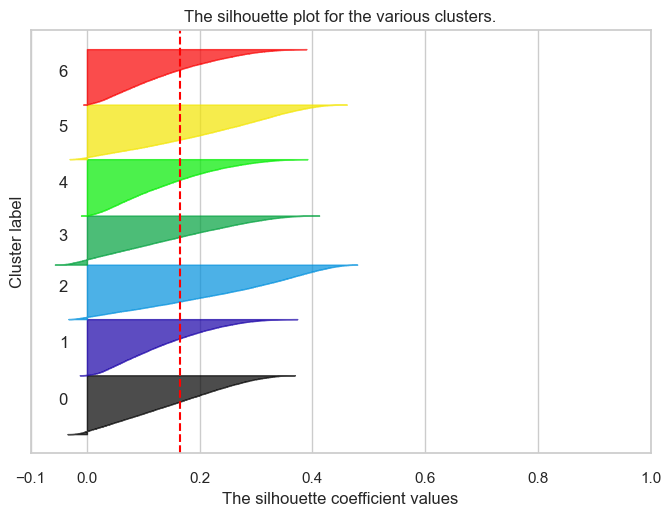

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"El coeficiente de silueta promedio es: {silhouette_avg}")

sample_silhouette_values = silhouette_samples(X, cluster_labels)
n_clusters = len(np.unique(cluster_labels))

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for the 0 samples

plt.title("The silhouette plot for the various clusters.")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")

plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

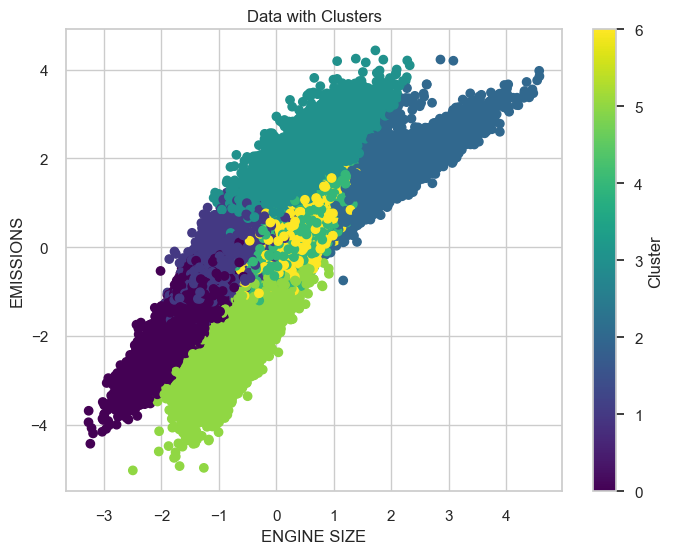

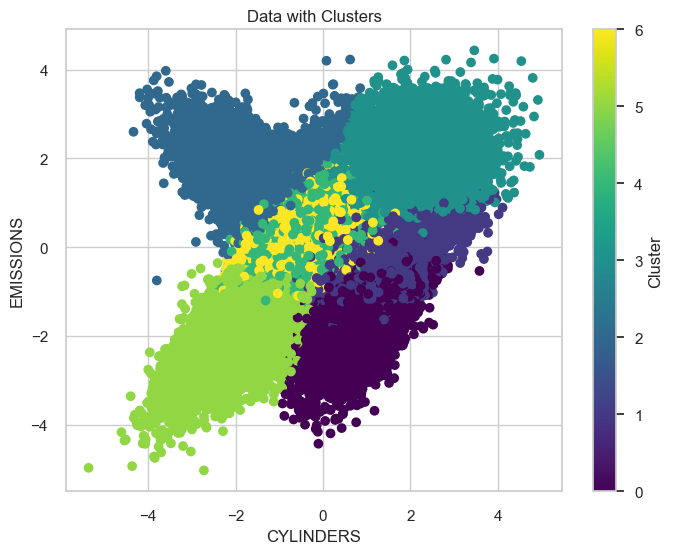

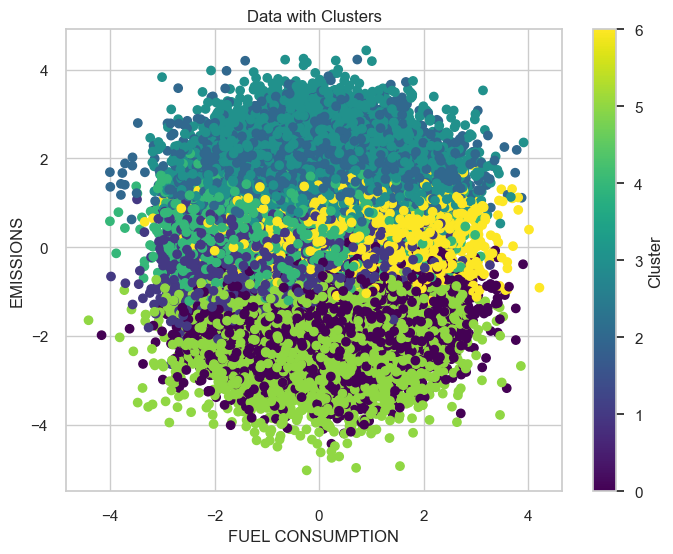

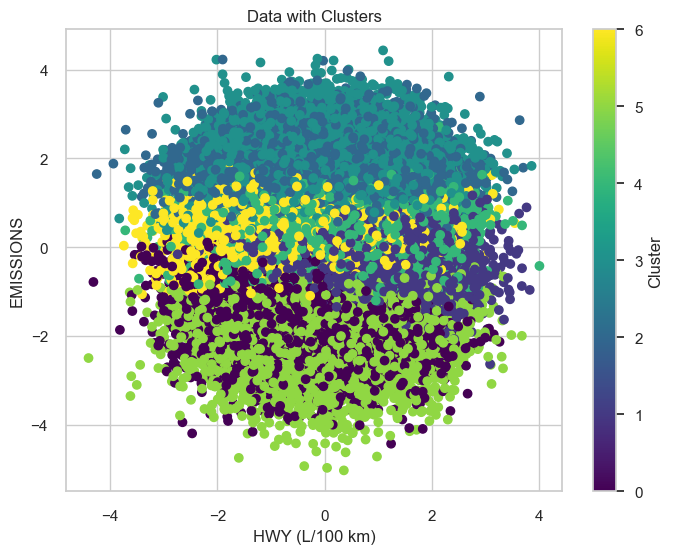

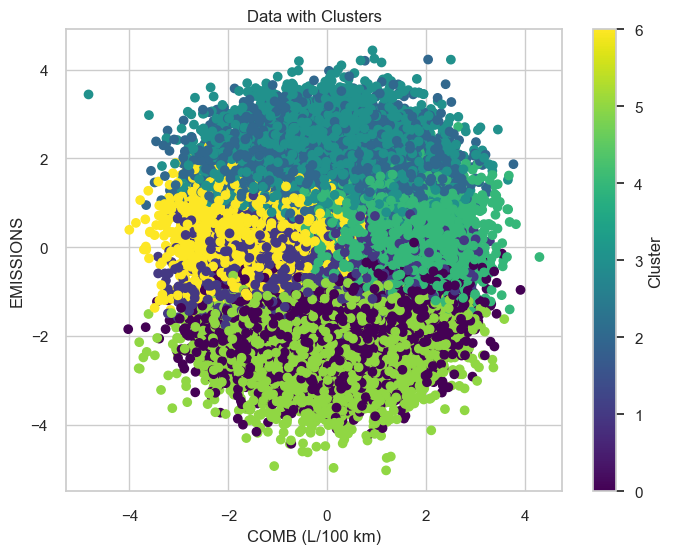

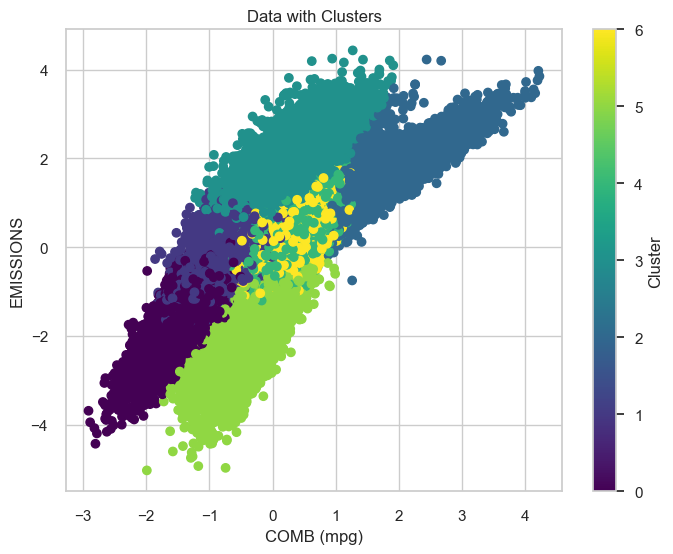

In [ ]:
# For 7 clusters
# Generate data
X, y = make_classification(n_samples=100000, n_features=len(columns), random_state=42)

# Create a K-Means clustering model
kmeans = KMeans(n_clusters=7, random_state=42)

# Fit the model to your data
cluster_labels = kmeans.fit_predict(X)

for index in range(0, len(columns)-1):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, index], X[:, -1], c=cluster_labels, cmap='viridis')
    plt.xlabel(columns[index])
    plt.ylabel(columns[-1])
    plt.title('Data with Clusters')
    plt.colorbar(label='Cluster')
    plt.show()

El coeficiente de silueta promedio es: 0.1658118221712651


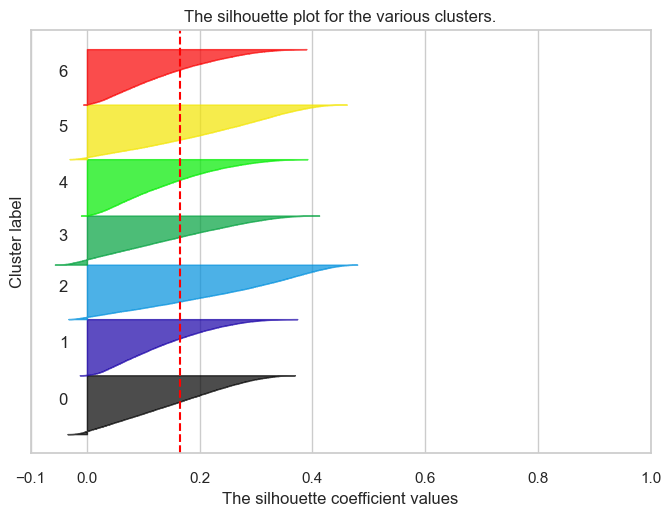

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"El coeficiente de silueta promedio es: {silhouette_avg}")

sample_silhouette_values = silhouette_samples(X, cluster_labels)
n_clusters = len(np.unique(cluster_labels))

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for the 0 samples

plt.title("The silhouette plot for the various clusters.")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")

plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

#### Interpretación de grupos

Como se pudo observar en los distintos modelos al realizar el clustering de 2, 5 y 7 clusters se llego a evidenciar que los grupos se forman basandose, en la mayor parte, la emision del CO2 con el tamaño del motor, la cantidad de cilindros o el consumo de combustible por lo que se denota que entre mayor sea el motor y mayor cantidad de cilindros tenga junto con mayor consumo, esté llevara a cabo una mayor emisión. Por lo que los grupos se clasificacion de menor a mayor.

## Regresión Lineal

In [ ]:
%pip install statsmodels

  Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector #Para stepwise
from sklearn.linear_model import RidgeCV, Ridge #Para Ridge
from sklearn.linear_model import LassoCV,Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
percentiles = datos['EMISSIONS'].quantile([0.33, 0.66, 1])
percentiles

0.33    221.0
0.66    268.0
1.00    608.0
Name: EMISSIONS, dtype: float64

In [ ]:
# Discretizacion de la variable de respuesta para balanceo
datos['EMISSIONS CATEGORY'] = pd.cut(datos['EMISSIONS'], bins=[0, 221, 268, 608], labels=['LOW', 'MEDIUM', 'HIGH'])

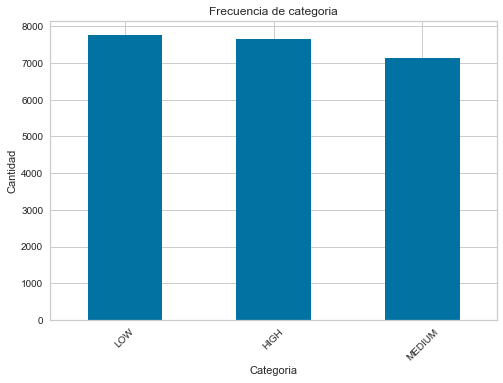

In [ ]:
#Proporcion de clases en datos originales
ax = datos['EMISSIONS CATEGORY'].value_counts().plot.bar()
plt.title('Frecuencia de categoria')
plt.xlabel('Categoria')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Dividir en train y test, manteniendo proporción de categorías
train, test = train_test_split(datos.copy(), test_size=0.20, stratify=datos['EMISSIONS CATEGORY'],random_state=42)

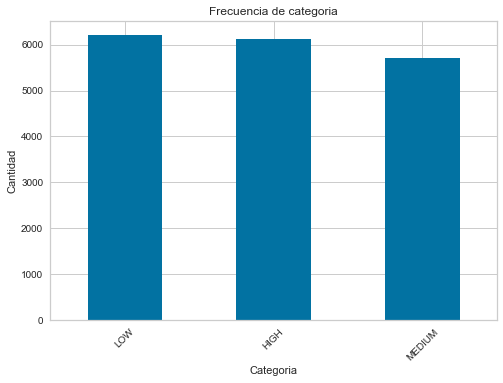

In [ ]:
#Visualizacion de proporción de categorías en train
ax = train['EMISSIONS CATEGORY'].value_counts().plot.bar()
plt.title('Frecuencia de categoria')
plt.xlabel('Categoria')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

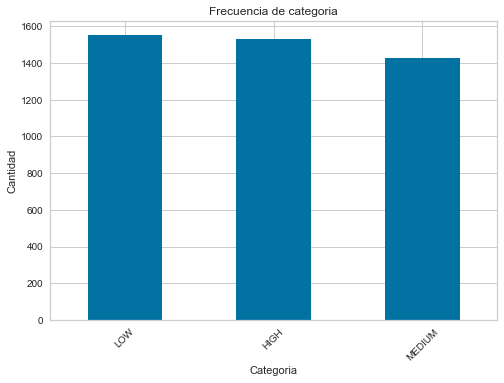

In [ ]:
#Visualizacion de proporción de categorías en test
ax = test['EMISSIONS CATEGORY'].value_counts().plot.bar()
plt.title('Frecuencia de categoria')
plt.xlabel('Categoria')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [ ]:
columns = train.select_dtypes(include='number').columns.to_list()
columns

['YEAR',
 'ENGINE SIZE',
 'CYLINDERS',
 'FUEL CONSUMPTION',
 'HWY (L/100 km)',
 'COMB (L/100 km)',
 'COMB (mpg)',
 'EMISSIONS']

In [ ]:
# Variables predictoras
X2 = np.array(train[columns[1:len(columns)-1]])
Y2 = np.array(train[columns[len(columns)-1]])
# Crear el modelo de regresion lineal
lm = LinearRegression()
modelo1 = lm.fit(X2, Y2)
# Prediccion
X_test = np.array(test[columns[1:len(columns)-1]])
Y_test = np.array(test[columns[len(columns)-1]])
y_pred_modelo1 = modelo1.predict(X_test)

In [ ]:
# calculate aic for regression 
def calculate_aic(n, mse, num_params):
 aic = n * np.log(mse) + 2 * num_params
 return aic
# calculate bic for regression
def calculate_bic(n, mse, num_params):
 bic = n * np.log(mse) + num_params * np.log(n)
 return bic

In [ ]:
# Regression metrics
explained_variance_modelo1=metrics.explained_variance_score(Y_test, y_pred_modelo1)
mean_absolute_error_modelo1=metrics.mean_absolute_error(Y_test, y_pred_modelo1) 
mse_modelo1=metrics.mean_squared_error(Y_test, y_pred_modelo1) 
mean_squared_log_error_modelo1=metrics.mean_squared_log_error(Y_test, y_pred_modelo1)
median_absolute_error_modelo1=metrics.median_absolute_error(Y_test, y_pred_modelo1)
r2_modelo1=metrics.r2_score(Y_test, y_pred_modelo1)
k = modelo1.coef_.size
n = X2.shape[0]
aic_modelo1 = calculate_aic(n,mse_modelo1,k)
bic_modelo1 = calculate_bic(n,mse_modelo1,k)

print('explained_variance: ', round(explained_variance_modelo1,4))   
print('mean_squared_log_error: ', round(mean_squared_log_error_modelo1,4))
print('r2: ', round(r2_modelo1,4))
print('MAE: ', round(mean_absolute_error_modelo1,4))
print('MSE: ', round(mse_modelo1,4))
print('RMSE: ', round(np.sqrt(mse_modelo1),4))
print('AIC: ',round(aic_modelo1,4))
print('BIC: ',round(bic_modelo1,4))

explained_variance:  0.8973
mean_squared_log_error:  0.0053
r2:  0.8972
MAE:  11.6083
MSE:  362.8752
RMSE:  19.0493
AIC:  106364.4026
BIC:  106411.206


Text(0, 0.5, 'Residuales')

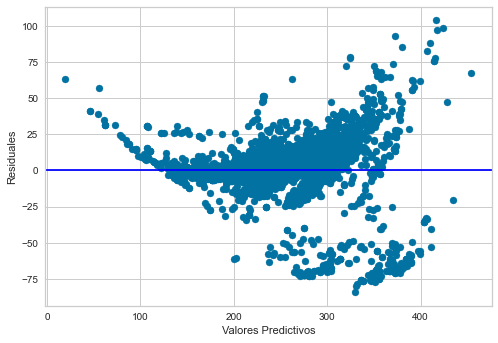

In [ ]:
resid_modelo1=Y_test-y_pred_modelo1
plt.scatter(y_pred_modelo1,resid_modelo1)
plt.axhline(0,color='blue')
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')

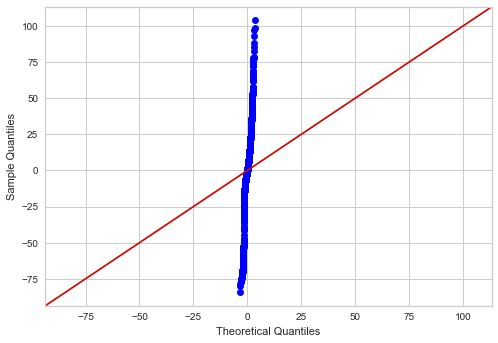

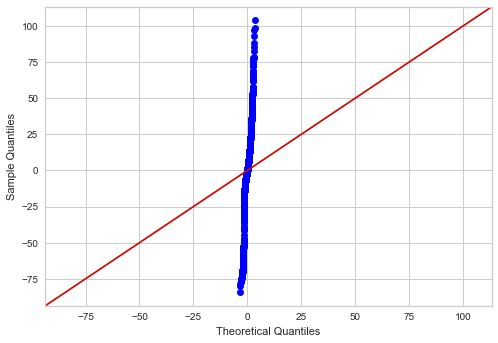

In [ ]:
sm.qqplot(resid_modelo1,line='45')

In [ ]:
k,p=sm.stats.diagnostic.lilliefors(resid_modelo1)
print("p =",p)

p = 0.0009999999999998899


In [ ]:
x_pred_modelo1 = modelo1.predict(X2)
mse_modelo1_train=metrics.mean_squared_error(Y2, x_pred_modelo1) 

print("MSE_train: ",round(mse_modelo1_train,4))
print('MSE_test: ', round(mse_modelo1,4))

MSE_train:  382.1011
MSE_test:  362.8752


### Selector de predictores

In [ ]:
lr = LinearRegression()

# Crea un modelo de seleccion de predictores stepwise backward, con un k-fold de 5 en la validación cruzada
seleccionPredictores = SequentialFeatureSelector(lr, direction='backward', cv=5)
seleccionPredictores.fit(X2, Y2)

# Extrae los índices de los predictores
indicePredictores= seleccionPredictores.get_support(indices=True)



# Variables seleccionadas
print("Predictores:   ")

for i in indicePredictores:
    print(columns[i])



Predictores:   
ENGINE SIZE
HWY (L/100 km)
COMB (L/100 km)


In [ ]:
# Se seleccionan las variables
X_train_stw= X2[:,indicePredictores]
X_test_stw = X_test[:,indicePredictores]
# Entrenamiento con las variables seleccionadas
modelo2 = LinearRegression()
modelo2.fit(X_train_stw, Y2)

# Prediccion
y_pred_modelo2 = modelo2.predict(X_test_stw)
# Regression metrics
explained_variance_modelo2=metrics.explained_variance_score(Y_test, y_pred_modelo2)
mean_absolute_error_modelo2=metrics.mean_absolute_error(Y_test, y_pred_modelo2) 
mse_modelo2=metrics.mean_squared_error(Y_test, y_pred_modelo2) 
mean_squared_log_error_modelo2=metrics.mean_squared_log_error(Y_test, y_pred_modelo2)
median_absolute_error_modelo2=metrics.median_absolute_error(Y_test, y_pred_modelo2)
r2_modelo2=metrics.r2_score(Y_test, y_pred_modelo2)
k = modelo2.coef_.size
n = X2.shape[0]
aic_modelo2 = calculate_aic(n,mse_modelo2,k)
bic_modelo2 = calculate_bic(n,mse_modelo2,k)

print('explained_variance: ', round(explained_variance_modelo2,4))   
print('mean_squared_log_error: ', round(mean_squared_log_error_modelo2,4))
print('r2: ', round(r2_modelo2,4))
print('MAE: ', round(mean_absolute_error_modelo2,4))
print('MSE: ', round(mse_modelo2,4))
print('RMSE: ', round(np.sqrt(mse_modelo2),4))
print('AIC: ',round(aic_modelo2,4))
print('BIC: ',round(bic_modelo2,4))

explained_variance:  0.894
mean_squared_log_error:  0.0054
r2:  0.8939
MAE:  12.0357
MSE:  374.5652
RMSE:  19.3537
AIC:  106930.5193
BIC:  106953.921


Text(0, 0.5, 'Residuales')

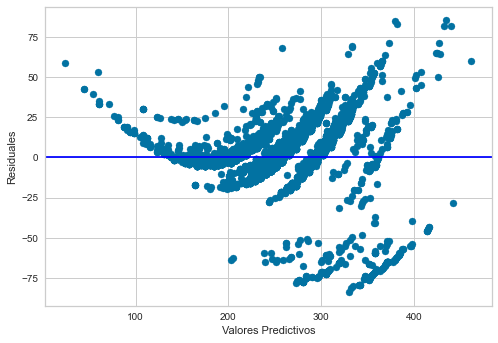

In [ ]:
resid_modelo2=Y_test-y_pred_modelo2
plt.scatter(y_pred_modelo2,resid_modelo2)
plt.axhline(0,color='blue')
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')

In [ ]:
sm.qqplot(resid_modelo2,line='45')

In [ ]:
k,p=sm.stats.diagnostic.lilliefors(resid_modelo1)
print("p =",p)

p = 0.0009999999999998899


In [ ]:
x_pred_modelo2 = modelo2.predict(X_train_stw)
mse_modelo2_train=metrics.mean_squared_error(Y2, x_pred_modelo2) 

print("MSE_train: ",round(mse_modelo2_train,4))
print('MSE_test: ', round(mse_modelo2,4))

MSE_train:  394.9071
MSE_test:  374.5652


## Ridge

In [ ]:
alphas = np.logspace(-2, 0, num=20)
ridge = make_pipeline(StandardScaler(),
                      RidgeCV(alphas=alphas, store_cv_values=True))


cv = ShuffleSplit(n_splits=5, random_state=1)
cv_results = cross_validate(ridge, X2, Y2,
                            cv=cv, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True, n_jobs=2)
train_error = -cv_results["train_score"]
print(f"Error medio cuadrado de la regresión con datos de entrenamiento:\n"
      f"{train_error.mean():.3f} ± {train_error.std():.3f}")

test_error = -cv_results["test_score"]
print(f"Error medio cuadrado de la regresion con los datos de prueba:\n"
      f"{test_error.mean():.3f} ± {test_error.std():.3f}")
mse_alphas = [est[-1].cv_values_.mean(axis=0)
            for est in cv_results["estimator"]]
cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)
cv_alphas


Error medio cuadrado de la regresión con datos de entrenamiento:
380.455 ± 1.380
Error medio cuadrado de la regresion con los datos de prueba:
397.363 ± 12.343


0.010000    0.012743    0.016238    0.020691    0.026367    0.033598  \
0  380.024801  380.024762  380.024712  380.024651  380.024576  380.024486   
1  383.779112  383.779068  383.779014  383.778947  383.778865  383.778766   
2  379.993690  379.993648  379.993596  379.993531  379.993453  379.993360   
3  380.878430  380.878390  380.878340  380.878280  380.878206  380.878117   
4  381.130967  381.130924  381.130872  381.130809  381.130732  381.130641   

     0.042813    0.054556    0.069519    0.088587    0.112884    0.143845  \
0  380.024378  380.024254  380.024115  380.023969  380.023830  380.023727   
1  383.778649  383.778514  383.778364  383.778209  383.778065  383.777964   
2  379.993251  379.993128  379.992995  379.992864  379.992756  379.992710   
3  380.878012  380.877894  380.877764  380.877634  380.877523  380.877463   
4  381.130538  381.130423  381.130306  381.130201  381.130136  381.130159   

     0.183298    0.233572    0.297635    0.379269    0.483293    0.615848  \
0  380.023705  380.023840  380.024246  380.025089  380.026596  380.029061   
1  383.777960  383.778138  383.778626  383.779607  383.781332  383.784119   
2  379.992787  379.993085  379.993750  379.994993  379.997098  380.000426   
3  380.877510  380.877753  380.878326  380.879421  380.881302  380.884307   
4  381.130345  381.130815  381.131743  381.133383  381.136073  381.140240   

     0.784760    1.000000  
0  380.032834  380.038292  
1  383.788339  383.794380  
2  380.005400  380.012467  
3  380.888836  380.895322  
4  381.146386  381.155034

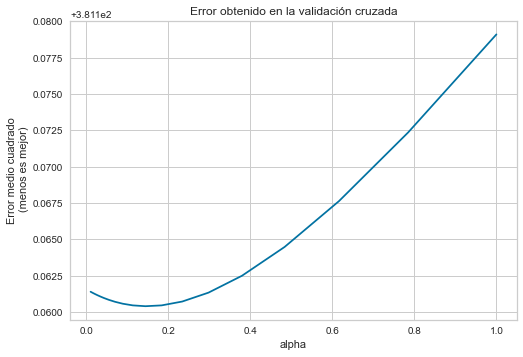

In [ ]:
cv_alphas.mean(axis=0).plot(marker="+")
plt.ylabel("Error medio cuadrado\n (menos es mejor)")
plt.xlabel("alpha")
_ = plt.title("Error obtenido en la validación cruzada")

In [ ]:
mejores_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]
mejores_alphas

[0.18329807108324356,
 0.18329807108324356,
 0.14384498882876628,
 0.14384498882876628,
 0.11288378916846889]

In [ ]:
print(f"El mejor alfa es:\n"
      f"{np.mean(mejores_alphas):.2f} ± {np.std(mejores_alphas):.2f}")

El mejor alfa es:
0.15 ± 0.03


In [ ]:
alfa_modelo3 = np.mean(mejores_alphas)
modelo3 = Ridge(alpha=alfa_modelo3)
modelo3.fit(X2, Y2)

# Predict the target values on the testing set
y_pred_modelo3 = modelo3.predict(X_test)

In [ ]:
# Regression metrics
explained_variance_modelo3=metrics.explained_variance_score(Y_test, y_pred_modelo3)
mean_absolute_error_modelo3=metrics.mean_absolute_error(Y_test, y_pred_modelo3) 
mse_modelo3=metrics.mean_squared_error(Y_test, y_pred_modelo3) 
mean_squared_log_error_modelo3=metrics.mean_squared_log_error(Y_test, y_pred_modelo3)
median_absolute_error_modelo3=metrics.median_absolute_error(Y_test, y_pred_modelo3)
r2_modelo3=metrics.r2_score(Y_test, y_pred_modelo3)
k = modelo3.coef_.size
n = X2.shape[0]
aic_modelo3 = calculate_aic(n,mse_modelo3,k)
bic_modelo3 = calculate_bic(n,mse_modelo3,k)

print('explained_variance: ', round(explained_variance_modelo3,4))   
print('mean_squared_log_error: ', round(mean_squared_log_error_modelo3,4))
print('r2: ', round(r2_modelo3,4))
print('MAE: ', round(mean_absolute_error_modelo3,4))
print('MSE: ', round(mse_modelo3,4))
print('RMSE: ', round(np.sqrt(mse_modelo3),4))
print('AIC: ',round(aic_modelo3,4))
print('BIC: ',round(bic_modelo3,4))

explained_variance:  0.8973
mean_squared_log_error:  0.0053
r2:  0.8972
MAE:  11.6083
MSE:  362.8763
RMSE:  19.0493
AIC:  106364.4546
BIC:  106411.258


## Lasso

In [ ]:
lasso = make_pipeline(StandardScaler(), LassoCV(alphas = np.arange(0,1,0.02), cv=cv, n_jobs = 2))
cv_results_lasso = cross_validate(lasso, X2, Y2,
                            cv=cv, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True, n_jobs=2)
train_error = -cv_results_lasso["train_score"]
print(f"Error medio cuadrado de la regresión con datos de entrenamiento:\n"
      f"{train_error.mean():.3f} ± {train_error.std():.3f}")

test_error_lasso = -cv_results_lasso["test_score"]
print(f"Error medio cuadrado de la regresion con los datos de prueba:\n"
      f"{test_error.mean():.3f} ± {test_error.std():.3f}")
alphas = []
for est in cv_results_lasso["estimator"]:
    alphas.append(est[1].alpha_)
print
print(alphas)
-cv_results_lasso["test_score"]

Error medio cuadrado de la regresión con datos de entrenamiento:
380.901 ± 1.378
Error medio cuadrado de la regresion con los datos de prueba:
397.363 ± 12.343
[0.0, 0.0, 0.0, 0.0, 0.38]


array([408.36734031, 374.63243067, 407.51391716, 399.82737502,
       397.50987485])

In [ ]:
modelo4 = Lasso(alpha=0.04)
modelo4.fit(X2, Y2)

# Predict the target values on the testing set
y_pred_modelo4 = modelo4.predict(X_test)

In [ ]:
# Regression metrics
explained_variance_modelo4=metrics.explained_variance_score(Y_test, y_pred_modelo4)
mean_absolute_error_modelo4=metrics.mean_absolute_error(Y_test, y_pred_modelo4) 
mse_modelo4=metrics.mean_squared_error(Y_test, y_pred_modelo4) 
mean_squared_log_error_modelo4=metrics.mean_squared_log_error(Y_test, y_pred_modelo4)
median_absolute_error_modelo4=metrics.median_absolute_error(Y_test, y_pred_modelo4)
r2_modelo4=metrics.r2_score(Y_test, y_pred_modelo4)
k = modelo4.coef_.size
n = X2.shape[0]
aic_modelo4 = calculate_aic(n,mse_modelo4,k)
bic_modelo4 = calculate_bic(n,mse_modelo4,k)

print('explained_variance: ', round(explained_variance_modelo4,4))   
print('mean_squared_log_error: ', round(mean_squared_log_error_modelo4,4))
print('r2: ', round(r2_modelo4,4))
print('MAE: ', round(mean_absolute_error_modelo4,4))
print('MSE: ', round(mse_modelo4,4))
print('RMSE: ', round(np.sqrt(mse_modelo4),4))
print('AIC: ',round(aic_modelo4,4))
print('BIC: ',round(bic_modelo4,4))

explained_variance:  0.8971
mean_squared_log_error:  0.0053
r2:  0.897
MAE:  11.6245
MSE:  363.4015
RMSE:  19.0631
AIC:  106390.5501
BIC:  106437.3535


## Random Forest

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import numpy as np

In [24]:
datos_encoded = pd.get_dummies(datos, columns=['MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL'])

In [25]:
bounds = datos_encoded['EMISSIONS'].quantile([0.33, 0.66]).values

# Categorizar los datos en 'EMISSIONS'
datos_encoded['EMISSIONS_category'] = pd.cut(datos_encoded['EMISSIONS'], bins=[-np.inf, bounds[0], bounds[1], np.inf], labels=['low', 'medium', 'high'])

datos_encoded.drop('EMISSIONS', axis=1, inplace=True)

### Paso 2: Preparar los datos para el modelo
# Separar las características y la variable objetivo ahora categorizada
X = datos_encoded.drop('EMISSIONS_category', axis=1)
y = datos_encoded['EMISSIONS_category']

### Paso 3: Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Configurar los modelos de Random Forest con diferentes parámetros
models = {
    'RF1': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    'RF2': RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    'RF3': RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42)
}

# Diccionario para almacenar las métricas de cada modelo
results = {}

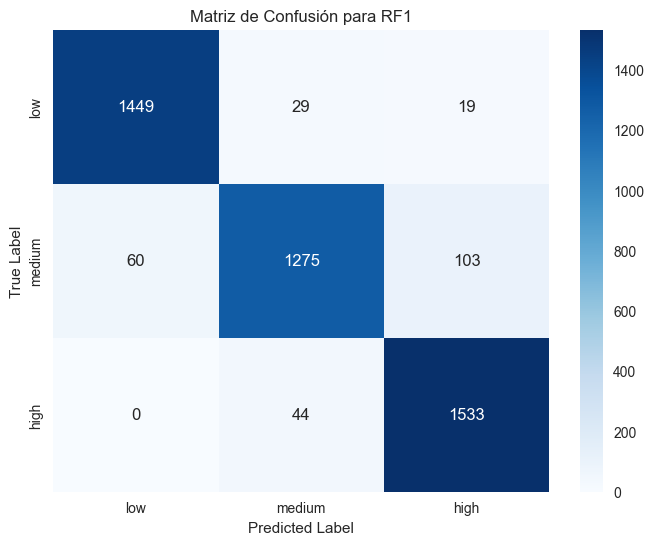

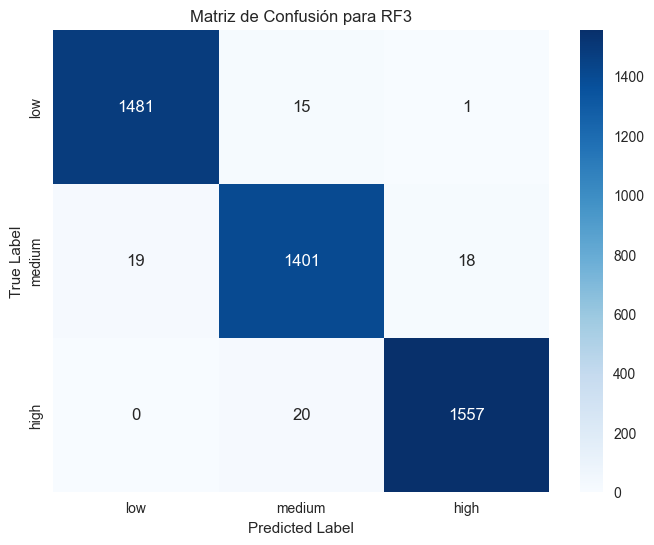

In [33]:
# Entrenar cada modelo y calcular métricas

labels = ['low', 'medium', 'high']

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_rf = model.predict(X_test)

    # Métricas
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    precision_rf = precision_score(y_test, y_pred_rf, average='macro')
    recall_rf = recall_score(y_test, y_pred_rf, average='macro')
    f1_rf = f1_score(y_test, y_pred_rf, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred_rf)

    # Almacenar resultados
    results[name] = {
        'Accuracy': accuracy_rf,
        'Precision': precision_rf,
        'Recall': recall_rf,
        'F1 Score': f1_rf,
        'Confusion Matrix': conf_matrix
    }


    print(f"Modelo: {name}")
    print(f"Accuracy: {accuracy_rf}")
    print(f"Precision: {precision_rf}")
    print(f"Recall: {recall_rf}")
    print(f"F1 Score: {f1_rf}")
    
    # Graficar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Matriz de Confusión para {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


## SVM

In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# Configurar columnas para características y objetivo
feature_cols = ['ENGINE SIZE', 'CYLINDERS', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)', 'COMB (L/100 km)']
target_col = 'EMISSIONS CATEGORY'


In [33]:
# Dividir datos en entrenamiento y prueba con stratify
train, test = train_test_split(datos.copy(), test_size=0.20, stratify=datos[target_col], random_state=42)

In [34]:
# Dividir características y objetivo
X_train, y_train = train[feature_cols], train[target_col]
X_test, y_test = test[feature_cols], test[target_col]

In [36]:
# Crear el pipeline de preprocesamiento
categorical_features = ['FUEL']
numeric_features = [col for col in feature_cols if col not in categorical_features]

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [37]:
# Definir cuadrículas para la búsqueda de hiperparámetros en cada SVM
param_grid_linear = {'svm__C': [0.1, 1, 10, 100]}
param_grid_poly = {'svm__C': [0.1, 1, 10, 100], 'svm__degree': [2, 3, 4]}
param_grid_rbf = {'svm__C': [0.1, 1, 10, 100], 'svm__gamma': ['scale', 'auto']}

In [38]:
# Crear diccionario de cuadrículas y modelos
models = {
    'SVM Lineal': (SVC(kernel='linear'), param_grid_linear),
    'SVM Polinómico': (SVC(kernel='poly'), param_grid_poly),
    'SVM RBF': (SVC(kernel='rbf'), param_grid_rbf)
}

In [39]:

# Función para realizar la búsqueda en cuadrícula
def get_best_model(name, model, param_grid):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('svm', model)])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

In [40]:
# Entrenar y evaluar cada modelo
final_results = {}
for model_name, (model, param_grid) in models.items():
    best_model, best_params = get_best_model(model_name, model, param_grid)
    final_results[model_name] = best_model
    
    # Predecir en el conjunto de prueba
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['LOW', 'MEDIUM', 'HIGH'])

    print(f"{model_name} - Mejor Parámetros: {best_params}")
    print(f"{model_name} - Accuracy: {accuracy}\n")
    print(f"{model_name} - Reporte:\n{report}\n")

SVM Lineal - Mejor Parámetros: {'svm__C': 100}
SVM Lineal - Accuracy: 0.9827127659574468

SVM Lineal - Reporte:
              precision    recall  f1-score   support

         LOW       0.99      0.99      0.99      1530
      MEDIUM       0.99      0.99      0.99      1552
        HIGH       0.97      0.97      0.97      1430

    accuracy                           0.98      4512
   macro avg       0.98      0.98      0.98      4512
weighted avg       0.98      0.98      0.98      4512


SVM Polinómico - Mejor Parámetros: {'svm__C': 100, 'svm__degree': 3}
SVM Polinómico - Accuracy: 0.9860372340425532

SVM Polinómico - Reporte:
              precision    recall  f1-score   support

         LOW       0.99      0.99      0.99      1530
      MEDIUM       0.99      0.99      0.99      1552
        HIGH       0.98      0.98      0.98      1430

    accuracy                           0.99      4512
   macro avg       0.99      0.99      0.99      4512
weighted avg       0.99      0.99     

In [41]:
# StratifiedKFold para la validación cruzada
strat_kfold = StratifiedKFold(n_splits=5)

# validación cruzada
def evaluate_model(name, model):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('svm', model)])
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=strat_kfold, scoring='accuracy')
    
    print(f"{name} - Validación Cruzada (Accuracy): {cv_scores}")
    print(f"{name} - Accuracy Promedio: {np.mean(cv_scores)}\n")
    
    # Entrenar y predecir en el conjunto de prueba
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Imprimir reporte de métricas
    print(f"{name} - Accuracy Test: {accuracy}")
    print(f"{name} - Precision: {precision}")
    print(f"{name} - Recall: {recall}")
    print(f"{name} - F1 Score: {f1}\n")

    # Imprimir matriz de confusión
    cm = confusion_matrix(y_test, y_pred, labels=['LOW', 'MEDIUM', 'HIGH'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['LOW', 'MEDIUM', 'HIGH'], yticklabels=['LOW', 'MEDIUM', 'HIGH'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(f'{name} - Matriz de Confusión')
    plt.show()

SVM Lineal - Validación Cruzada (Accuracy): [0.98060405 0.97866445 0.97783319 0.9758936  0.97921286]
SVM Lineal - Accuracy Promedio: 0.978441629972863

SVM Lineal - Accuracy Test: 0.9831560283687943
SVM Lineal - Precision: 0.9832132249252555
SVM Lineal - Recall: 0.9831560283687943
SVM Lineal - F1 Score: 0.9831687179627261



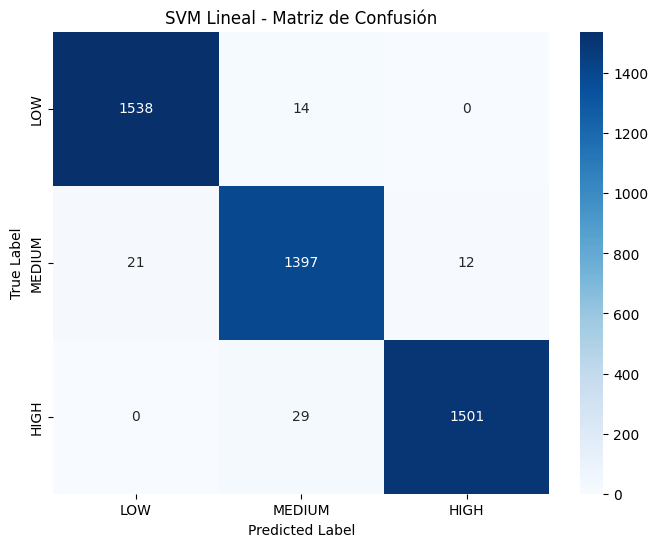

SVM Polinómico - Validación Cruzada (Accuracy): [0.96037684 0.95843724 0.94929343 0.95289554 0.95232816]
SVM Polinómico - Accuracy Promedio: 0.9546662415161897

SVM Polinómico - Accuracy Test: 0.9581117021276596
SVM Polinómico - Precision: 0.9615408874274735
SVM Polinómico - Recall: 0.9581117021276596
SVM Polinómico - F1 Score: 0.9586388988226378



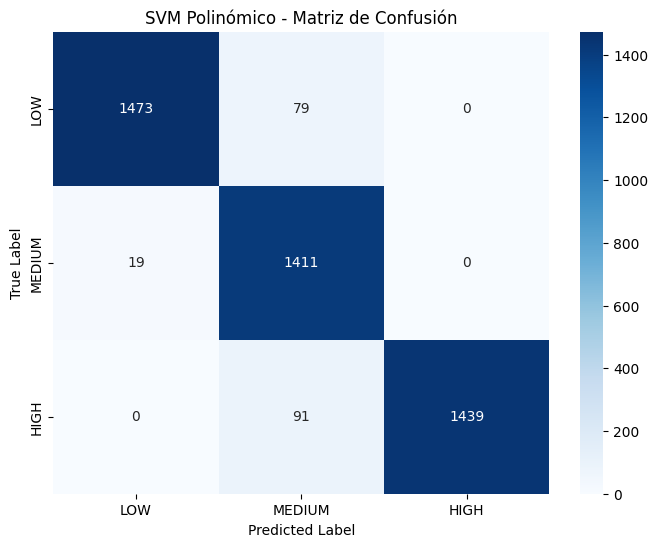

SVM RBF - Validación Cruzada (Accuracy): [0.97672485 0.97894154 0.97755611 0.97561651 0.97699557]
SVM RBF - Accuracy Promedio: 0.9771669157974735

SVM RBF - Accuracy Test: 0.9798315602836879
SVM RBF - Precision: 0.9800068200947375
SVM RBF - Recall: 0.9798315602836879
SVM RBF - F1 Score: 0.979880292275622



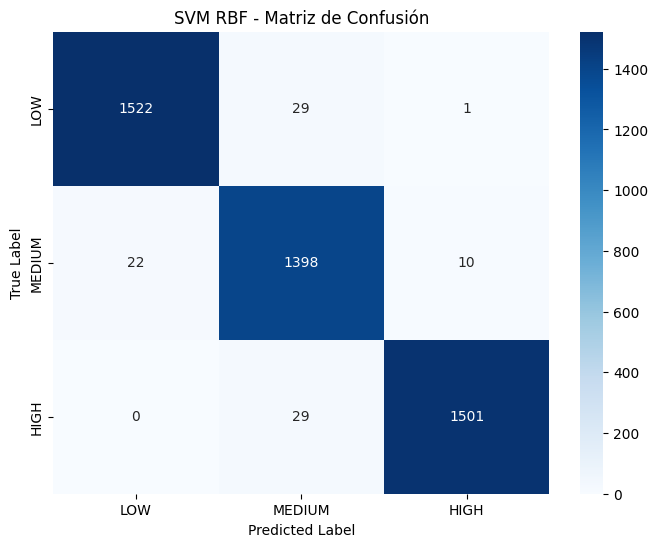

In [42]:
# Evaluar cada modelo
for model_name, (model, _) in models.items():
    evaluate_model(model_name, model)